In [130]:
# importing libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn. metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report, hamming_loss
import pickle

In [131]:
# loading dataset into python environment
data = pd.read_excel('webmdexcel.xlsx', dtype = {'Age': str, 'Condition': str, 'Date': str, 'Drug': str, 'DrugId': int, 'EaseofUse': 'int8', 'Effectiveness': 'int8', 'Reviews': str, 'Satisfaction': 'int8', 'Sex': str, 'Sides': str, 'UsefulCount': 'int16'})

In [132]:
# display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            350604 non-null  object
 1   Condition      362763 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int32 
 5   EaseofUse      362806 non-null  int8  
 6   Effectiveness  362806 non-null  int8  
 7   Reviews        320912 non-null  object
 8   Satisfaction   362806 non-null  int8  
 9   Sex            336269 non-null  object
 10  Sides          345346 non-null  object
 11  UsefulCount    362806 non-null  int16 
dtypes: int16(1), int32(1), int8(3), object(7)
memory usage: 22.5+ MB


In [133]:
# count of rows and columns
data.shape

(362806, 12)

In [134]:
# display first 40 rows
data.head(40)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,NaN,0
4,35-44,Other,2009-06-01 00:00:00,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1
5,55-64,Other,7/19/2008,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,NaN,0
6,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
7,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0
8,25-34,Acne,4/27/2016,wymzya fe,163180,4,2,NaN,2,Female,"Nausea , vomiting , headache , bloating , ...",1
9,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0


## MISSING VALUES

In [135]:
# count of null values
data.isnull().sum()

Age              12202
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          41894
Satisfaction         0
Sex              26537
Sides            17460
UsefulCount          0
dtype: int64

In [136]:
# percentage of null values
(data.isnull().sum()*100)/len(data)

Age               3.363230
Condition         0.011852
Date              0.000000
Drug              0.000000
DrugId            0.000000
EaseofUse         0.000000
Effectiveness     0.000000
Reviews          11.547218
Satisfaction      0.000000
Sex               7.314377
Sides             4.812489
UsefulCount       0.000000
dtype: float64

~ Columns 'Age', 'Condition', 'Reviews', 'Sex', 'Sides' are having null values.

**About this file**
*******
Drug (categorical): name of drug

DrugId (numerical): drug id

Condition (categorical): name of condition

Review (text): patient review

Side (text): side effects associated with drug (if any)

EaseOfUse (numerical): 5 star rating 

Effectiveness (numerical): 5 star rating 

Satisfaction (numerical): 5 star rating 

Date (date): date of review entry

UsefulCount (numerical): number of users who found review useful.

Age (numerical): age group range of user

Sex (categorical): gender of user

In [137]:
# unique values in 'Date' column
data['Date'].unique()

array(['9/21/2014', '1/13/2011', '7/16/2012', ..., '10/25/2019',
       '6/22/2019', '10/19/2019'], dtype=object)

In [138]:
# checking data types of each column
data.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int32
EaseofUse          int8
Effectiveness      int8
Reviews          object
Satisfaction       int8
Sex              object
Sides            object
UsefulCount       int16
dtype: object

In [139]:
# convert date to a similar format
# need to change which is of object data type to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [140]:
# checking data types of each column
data.dtypes

Age                      object
Condition                object
Date             datetime64[ns]
Drug                     object
DrugId                    int32
EaseofUse                  int8
Effectiveness              int8
Reviews                  object
Satisfaction               int8
Sex                      object
Sides                    object
UsefulCount               int16
dtype: object

In [141]:
# create a new column year, for that applying lambda function on 'Date' column
data['Year'] = data['Date'].apply(lambda x: x.year)

In [142]:
# display first 40 rows
data.head(40)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
0,75 or over,Stuffy Nose,2014-09-21,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,2014
1,25-34,Cold Symptoms,2011-01-13,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,2011
2,65-74,Other,2012-07-16,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0,2012
3,75 or over,Other,2010-09-23,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,NaN,0,2010
4,35-44,Other,2009-06-01,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1,2009
5,55-64,Other,2008-07-19,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,NaN,0,2008
6,25-34,Birth Control,2017-06-15,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0,2017
7,45-54,Disease of Ovaries with Cysts,2017-01-30,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0,2017
8,25-34,Acne,2016-04-27,wymzya fe,163180,4,2,NaN,2,Female,"Nausea , vomiting , headache , bloating , ...",1,2016
9,55-64,Stuffy Nose,2012-10-29,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0,2012


In [143]:
# storing all the column names as list
col = [feature for feature in data.columns]

# displaying unique values and its count in all columns
for i in col:
    print(f"{i} column \n")    
    nuni = data[i].nunique()
    print(f"Count of unique values = {nuni}\n")    
    uni = data[i].unique()
    print(f"Unique values = {uni}\n\n\n")   

Age column 

Count of unique values = 11

Unique values = ['75 or over' '25-34' '65-74' '35-44' '55-64' '45-54' '19-24' nan '13-18'
 '2023-12-07 00:00:00' '0-2' '2023-06-03 00:00:00']



Condition column 

Count of unique values = 1805

Unique values = ['Stuffy Nose' 'Cold Symptoms' 'Other' ...
 'Combative and Explosive Behavior' 'Lead Poisoning'
 'Poisoning from Swallowed Unknown Substance']



Date column 

Count of unique values = 4524

Unique values = ['2014-09-21T00:00:00.000000000' '2011-01-13T00:00:00.000000000'
 '2012-07-16T00:00:00.000000000' ... '2019-10-25T00:00:00.000000000'
 '2019-06-22T00:00:00.000000000' '2019-10-19T00:00:00.000000000']



Drug column 

Count of unique values = 7093

Unique values = ['25dph-7.5peh' 'warfarin (bulk) 100 % powder' 'wymzya fe' ...
 'chest congestion relief dm' 'chantix' 'chateal']



DrugId column 

Count of unique values = 6572

Unique values = [146724 144731 163180 ...  94947 144470 163265]



EaseofUse column 

Count of unique values = 7

In [144]:
# display rows having 'EaseofUse' as 6 or 10
data[(data['EaseofUse']==6)|(data['EaseofUse']==10)]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
195073,35-44,Migraine Prevention,2009-05-18,"topamax capsule, sprinkle",14494,6,6,ahoj som zo slovenska dlhe roky mam migreny tu...,6,Female,"Tiredness, drowsiness, dizziness , loss of co...",0,2009
195282,35-44,Migraine Prevention,2009-05-18,topamax,14494,6,6,ahoj som zo slovenska dlhe roky mam migreny tu...,6,Female,"Tiredness, drowsiness, dizziness , loss of co...",0,2009
273577,45-54,Other,2013-12-06,fiorinal with codeine #3,2421,10,10,.,10,NaN,"Nausea , vomiting , stomach upset, gas, sha...",5,2013


~ Since 'EaseofUse' column is a 5 star rating, replacing 6 with 3 (which is the equivalent number out of 5) and 10 with 5

In [145]:
# correcting errors in 'EaseofUse' column

data['EaseofUse'] = data['EaseofUse'].replace(10, 5)
data['EaseofUse'] = data['EaseofUse'].replace(6, 3)

In [146]:
# display rows having 'EaseofUse' as 6 or 10 after rectifying errors
data[(data['EaseofUse']==6)|(data['EaseofUse']==10)]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year


In [147]:
# display rows having 'Effectiveness' as 6 or 10
data[(data['Effectiveness']==6)|(data['Effectiveness']==10)]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
195073,35-44,Migraine Prevention,2009-05-18,"topamax capsule, sprinkle",14494,3,6,ahoj som zo slovenska dlhe roky mam migreny tu...,6,Female,"Tiredness, drowsiness, dizziness , loss of co...",0,2009
195282,35-44,Migraine Prevention,2009-05-18,topamax,14494,3,6,ahoj som zo slovenska dlhe roky mam migreny tu...,6,Female,"Tiredness, drowsiness, dizziness , loss of co...",0,2009
273577,45-54,Other,2013-12-06,fiorinal with codeine #3,2421,5,10,.,10,NaN,"Nausea , vomiting , stomach upset, gas, sha...",5,2013


~ Since 'Effectiveness' column is a 5 star rating, replacing 6 with 3 (which is the equivalent number out of 5) and 10 with 5

In [148]:
# correcting errors in 'Effectiveness' column

data['Effectiveness'] = data['Effectiveness'].replace(10, 5)
data['Effectiveness'] = data['Effectiveness'].replace(6, 3)

In [149]:
# display rows having 'Effectiveness' as 6 or 10 after rectifying errors
data[(data['Effectiveness']==6)|(data['Effectiveness']==10)]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year


In [150]:
# display rows having 'Satisfaction' as 6 or 10
data[(data['Satisfaction']==6)|(data['Satisfaction']==10)]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
195073,35-44,Migraine Prevention,2009-05-18,"topamax capsule, sprinkle",14494,3,3,ahoj som zo slovenska dlhe roky mam migreny tu...,6,Female,"Tiredness, drowsiness, dizziness , loss of co...",0,2009
195282,35-44,Migraine Prevention,2009-05-18,topamax,14494,3,3,ahoj som zo slovenska dlhe roky mam migreny tu...,6,Female,"Tiredness, drowsiness, dizziness , loss of co...",0,2009
273577,45-54,Other,2013-12-06,fiorinal with codeine #3,2421,5,5,.,10,NaN,"Nausea , vomiting , stomach upset, gas, sha...",5,2013


~ Since 'Satisfaction' column is a 5 star rating, replacing 6 with 3 (which is the equivalent number out of 5) and 10 with 5

In [151]:
# correcting errors in 'Satisfaction' column

data['Satisfaction'] = data['Satisfaction'].replace(10, 5)
data['Satisfaction'] = data['Satisfaction'].replace(6, 3)

In [152]:
# display rows having 'Satisfaction' as 6 or 10 after rectifying errors
data[(data['Satisfaction']==6)|(data['Satisfaction']==10)]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year


In [153]:
# convert the data type of 'Age' column to a string
data['Age'] = data['Age'].astype(str)

In [154]:
# display all the data types of the dataframe
data.dtypes

Age                      object
Condition                object
Date             datetime64[ns]
Drug                     object
DrugId                    int32
EaseofUse                  int8
Effectiveness              int8
Reviews                  object
Satisfaction               int8
Sex                      object
Sides                    object
UsefulCount               int16
Year                      int64
dtype: object

In [155]:
# unique values in 'Age' column
data['Age'].unique()

array(['75 or over', '25-34', '65-74', '35-44', '55-64', '45-54', '19-24',
       'nan', '13-18', '2023-12-07 00:00:00', '0-2',
       '2023-06-03 00:00:00'], dtype=object)

~ from the above unique values under 'Age' column, it is mentioned '2023-12-07 00:00:00' and '2023-06-03 00:00:00' which is a typographical error and it should be '7-12' and '3-6' which represents the age group range of user.

In [156]:
# displaying rows having errors in 'Age' column
data[(data['Age']=='2023-12-07 00:00:00')|(data['Age']=='2023-06-03 00:00:00')]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
3254,2023-12-07 00:00:00,Cushing's Syndrome,2009-12-28,lysodren,4494,4,4,My cocker spaniel female has been on lysodren ...,3,Female,"Dizziness , drowsiness, nausea / vomiting , ...",7,2009
3466,2023-12-07 00:00:00,Difficult or Painful Urination,2009-04-27,pyridium,5661,5,5,NaN,5,Female,"Headache , dizziness , or stomach upset may...",0,2009
3559,2023-12-07 00:00:00,Skin Disease of the Scalp,2012-12-28,luxiq foam,17045,5,5,This is a miracle product! It works within a d...,5,Male,"Burning, itching , or stinging may occur when...",3,2012
4681,2023-12-07 00:00:00,Pain,2009-07-26,lortab,78569,5,4,My 8 year old son was put on this med because ...,3,Male,"Nausea , vomiting , constipation , lighthea...",0,2009
4730,2023-06-03 00:00:00,Pain,2008-09-17,lortab,78569,5,5,This is working for my child (6yrs) who had he...,4,Female,"Nausea , vomiting , constipation , lighthea...",4,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361530,2023-06-03 00:00:00,Seasonal Runny Nose,2013-01-06,children's allegra allergy,155432,4,4,This has given my grandson loose bowels and a ...,4,Male,"Cough , fever, or stomach upset may occur.",3,2013
361531,2023-06-03 00:00:00,Other,2013-10-04,children's allegra allergy,155432,1,1,THIS DRUG GAVE MY SON A RASH.,1,Female,"Cough , fever, or stomach upset may occur.",1,2013
361535,2023-06-03 00:00:00,Head Pain,2013-01-17,children's acetaminophen,57616,5,4,the child age 3 and 1/2 experienced hallucinat...,5,Female,This drug usually has no side effects.,1,2013
361536,2023-06-03 00:00:00,Cold Symptoms,2011-07-04,child mucinex chest congestion,144872,4,3,My daughter developed some allergic reaction a...,3,Female,Nausea or vomiting may occur.,3,2011


In [157]:
# count of rows having errors in 'Age' column
len(data[(data['Age']=='2023-12-07 00:00:00')|(data['Age']=='2023-06-03 00:00:00')])

2482

~ 2482 rows having errors in 'Age' column

In [158]:
# replacing '2023-12-07 00:00:00' with '7-12', '2023-06-03 00:00:00' with '3-6' under 'Age' column
for age in data['Age'].unique():
    if age=='2023-12-07 00:00:00': 
        data['Age'].replace({'2023-12-07 00:00:00':'7-12'},inplace=True)
    elif age=='2023-06-03 00:00:00':
        data['Age'].replace({'2023-06-03 00:00:00':'3-6'},inplace=True)

In [159]:
# unique values in 'Age' column
data['Age'].unique()

array(['75 or over', '25-34', '65-74', '35-44', '55-64', '45-54', '19-24',
       'nan', '13-18', '7-12', '0-2', '3-6'], dtype=object)

## CHECKING FOR DUPLICATES

In [160]:
# display the rows having duplicates 
data[data.duplicated()]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
12102,55-64,High Blood Pressure,2013-05-22,lisinopril solution,6873,5,5,NaN,5,Male,"Dizziness , lightheadedness , tiredness, or ...",0,2013
17120,55-64,High Blood Pressure,2013-05-22,lisinopril,6873,5,5,NaN,5,Male,"Dizziness , lightheadedness , tiredness, or ...",0,2013
21816,75 or over,Other,2015-06-09,lucentis vial,144667,1,1,My father was in end stage Macular degenration...,1,Male,Mild discomfort and increased tears may occur ...,0,2015
22427,35-44,Abnormally Long or Heavy Periods,2019-08-22,larin fe,165169,4,4,Tired and nauseous the first week taking Larin...,4,Female,"Nausea , vomiting , headache , bloating , ...",0,2019
24302,25-34,Fungal Infection of Fingernails - Onychomycosis,2019-03-08,lamisil tablet,12422,2,2,Had a rare-ish fungal infection starting at th...,1,NaN,Diarrhea or stomach upset may occur.,0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339647,55-64,Diverticulitis,2019-09-08,cipro,1124,1,3,Helped ease Diverticulitis pain when combined...,1,Female,"Nausea , diarrhea , dizziness , lightheaded...",0,2019
339648,55-64,Diverticulitis,2019-09-08,"cipro suspension, microcapsule reconstituted",1124,1,3,Helped ease Diverticulitis pain when combined...,1,Female,"Nausea , diarrhea , dizziness , lightheaded...",0,2019
343090,25-34,Excessive Sweating,2019-09-20,clonidine hcl er,11754,5,5,Medication did exactly what I needed it to do....,5,Male,"Dizziness , lightheadedness , drowsiness, tir...",0,2019
343390,25-34,Excessive Sweating,2019-09-20,clonidine hcl,11754,5,5,Medication did exactly what I needed it to do....,5,Male,"Dizziness , lightheadedness , drowsiness, dr...",0,2019


~ 943 rows were duplicated rows

## EDA

**1) DRUG**

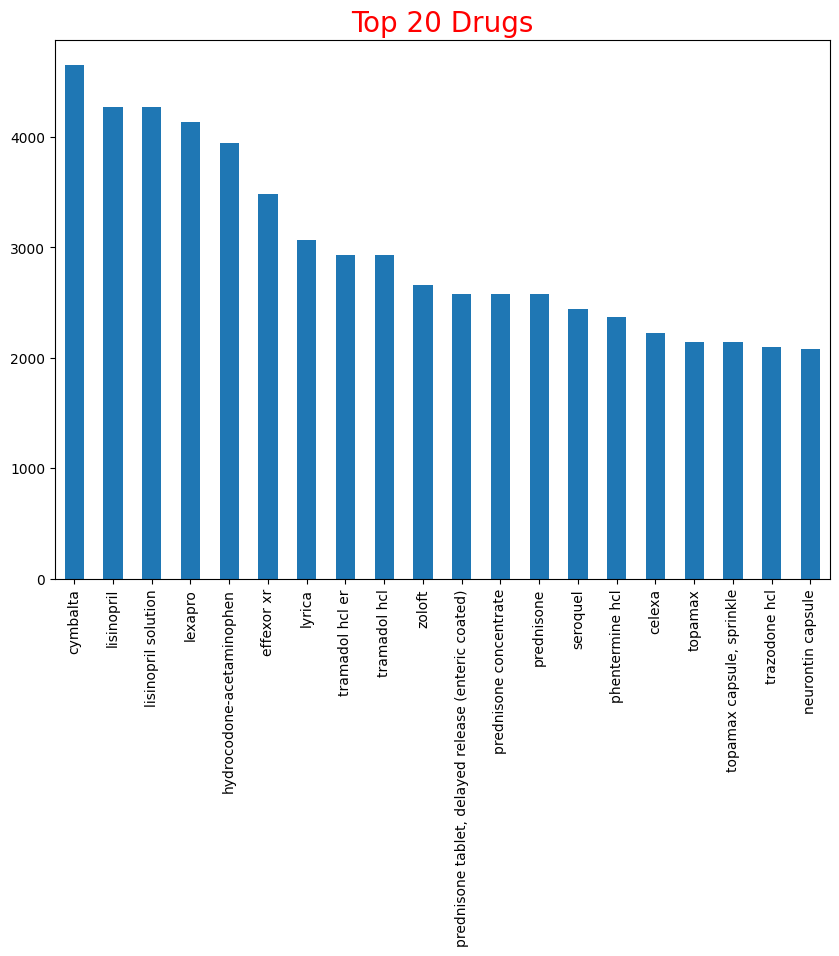

In [161]:
# display top 20 drugs
data['Drug'].value_counts().head(20).plot(kind='bar')
plt.rcParams['figure.figsize'] = (10, 7)
plt.title(label='Top 20 Drugs', fontsize=20, color='red');

In [162]:
# display details of 'cymbalta' drug with 'Condition'
list(data.loc[data['Drug'] == 'cymbalta'][['Drug','Condition']].groupby(['Drug']))

[('cymbalta',
              Drug                               Condition
  314212  cymbalta               Major Depressive Disorder
  314216  cymbalta            Repeated Episodes of Anxiety
  314223  cymbalta  Anxiousness associated with Depression
  314235  cymbalta  Anxiousness associated with Depression
  314246  cymbalta             Chronic Muscle or Bone Pain
  ...          ...                                     ...
  319081  cymbalta               Major Depressive Disorder
  319082  cymbalta               Major Depressive Disorder
  319083  cymbalta                        Neuropathic Pain
  319084  cymbalta               Major Depressive Disorder
  319085  cymbalta            Repeated Episodes of Anxiety
  
  [4648 rows x 2 columns])]

~ 'cymbalta' was the most widely used drug, used for curing Anxiousness associated with Depression, Chronic Muscle or Bone Pain, Neuropathic Pain etc.

**2) CONDITION**

In [163]:
# display condition for which drugs are used
data[['Drug', 'Condition']].head(20)

,Drug,Condition
0,25dph-7.5peh,Stuffy Nose
1,25dph-7.5peh,Cold Symptoms
2,warfarin (bulk) 100 % powder,Other
3,warfarin (bulk) 100 % powder,Other
4,warfarin (bulk) 100 % powder,Other
5,warfarin (bulk) 100 % powder,Other
6,wymzya fe,Birth Control
7,wymzya fe,Disease of Ovaries with Cysts
8,wymzya fe,Acne
9,"12 hour nasal relief spray, non-aerosol",Stuffy Nose


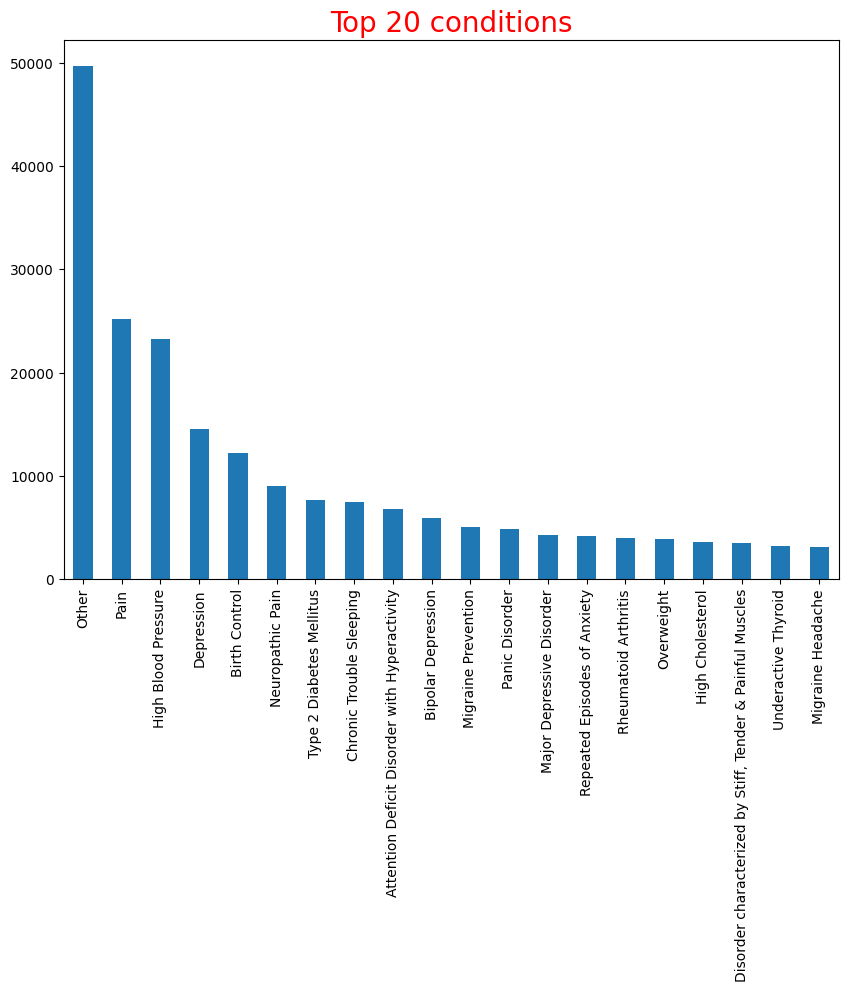

In [164]:
# Top 20 conditions
data['Condition'].value_counts().head(20).plot(kind='bar')
plt.rcParams['figure.figsize'] = (10, 7)
plt.title(label='Top 20 conditions', fontsize=20, color='red');
plt.show()

~ Majority of the medicines were used for curing other conditions.

In [165]:
# display rows having missing 'Condition' 
data[data['Condition'].isna()]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
31316,35-44,NaN,2010-04-09,lexapro,63990,4,3,i think that's placebo!,3,Male,"Nausea , dry mouth , trouble sleeping , con...",0,2010
37013,nan,NaN,2008-10-14,levetiracetam tablet for suspension,17855,5,1,NaN,5,NaN,"Drowsiness, dizziness , unusual tiredness, or...",0,2008
37117,nan,NaN,2008-10-14,levetiracetam,17855,5,1,NaN,5,NaN,"Drowsiness, dizziness , unusual tiredness, or...",0,2008
49273,65-74,NaN,2012-04-14,neurontin,9845,4,4,I finally convinced my shrink at Veterans this...,5,Male,"Drowsiness, dizziness , loss of coordination,...",1,2012
52267,55-64,NaN,2010-01-09,neurontin,9845,3,3,It has helped with my Multiple Sclerosis nerve...,3,Female,"Drowsiness, dizziness , loss of coordination,...",0,2010
63607,75 or over,NaN,2011-11-02,naproxen tablet,5173,1,1,needed 375 mg three times a day for relief. wo...,1,Male,"Upset stomach , nausea , heartburn , headac...",0,2011
63676,75 or over,NaN,2011-11-02,"naproxen suspension, (final dose form)",5173,1,1,needed 375 mg three times a day for relief. wo...,1,Male,"Upset stomach , nausea , heartburn , headac...",0,2011
63722,75 or over,NaN,2011-11-02,naproxen,5173,1,1,needed 375 mg three times a day for relief. wo...,1,Male,"Upset stomach , nausea , heartburn , headac...",0,2011
68864,65-74,NaN,2012-04-14,neurontin capsule,9845,4,4,I finally convinced my shrink at Veterans this...,5,Male,"Drowsiness, dizziness , loss of coordination,...",1,2012
71020,55-64,NaN,2010-01-09,neurontin capsule,9845,3,3,It has helped with my Multiple Sclerosis nerve...,3,Female,"Drowsiness, dizziness , loss of coordination,...",0,2010


~ When the condition for which the medicine is taken was missing, very less number of users were finding the review useful.

**3) EFFECTIVENESS**

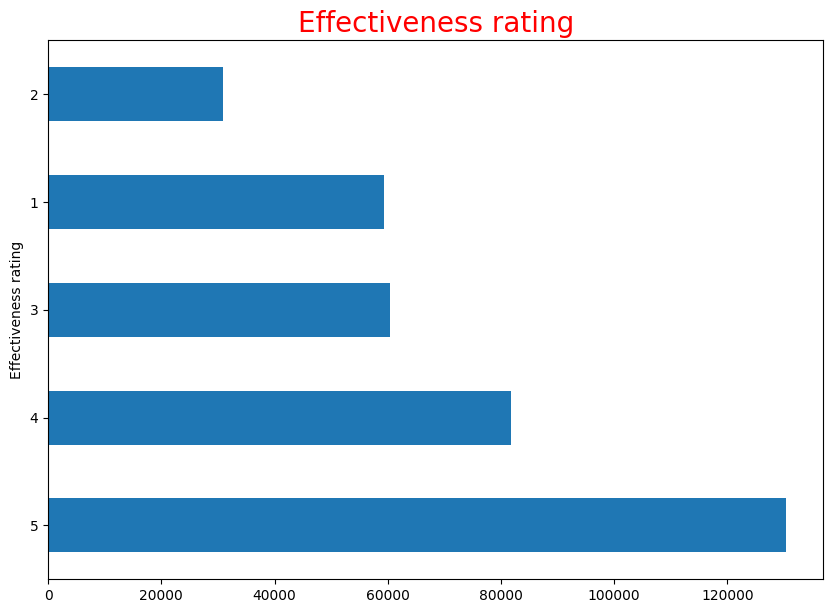

In [166]:
# display 'effectiveness' rating of drugs
data['Effectiveness'].value_counts().head(20).plot(kind='barh')
plt.rcParams['figure.figsize'] = (10, 7)
plt.title(label='Effectiveness rating', fontsize=20, color='red');
plt.ylabel('Effectiveness rating');
plt.show()

**4) EASE OF USE**

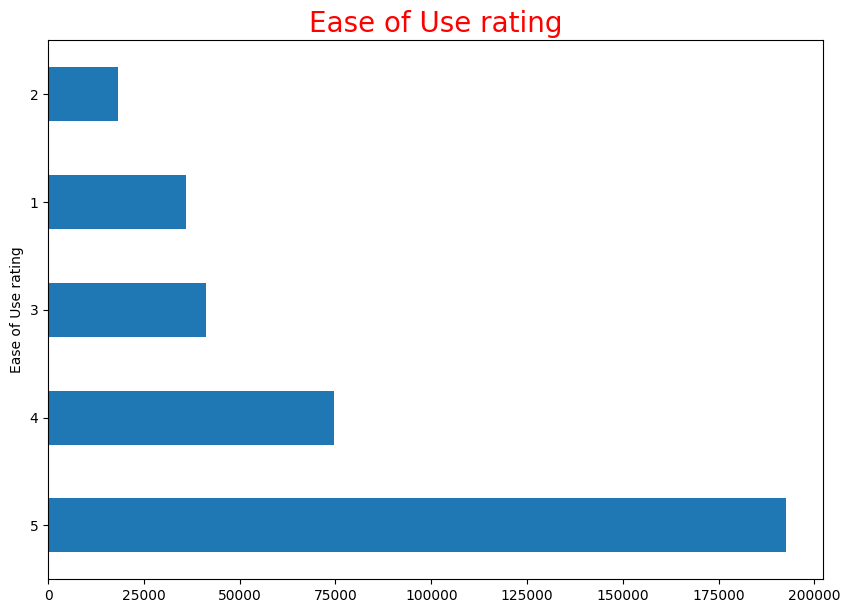

In [167]:
# display 'ease of use' rating of drugs
data['EaseofUse'].value_counts().head(20).plot(kind='barh')
plt.rcParams['figure.figsize'] = (10, 7)
plt.title(label='Ease of Use rating', fontsize=20, color='red');
plt.ylabel('Ease of Use rating');
plt.show()

**5) SATISFACTION**

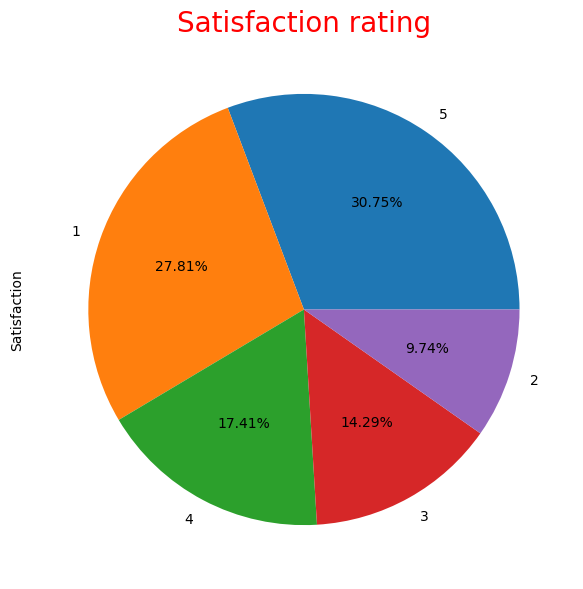

In [168]:
# display 'satisfaction' rating of drugs
data['Satisfaction'].value_counts().plot(kind='pie', autopct = '%1.2f%%');
plt.title(label='Satisfaction rating', fontsize=20, color='red');
plt.show()

~ Majority of the users had given 5 as rating for Satisfaction, Ease of use and Effectiveness of the drug.

**6) SIDES**

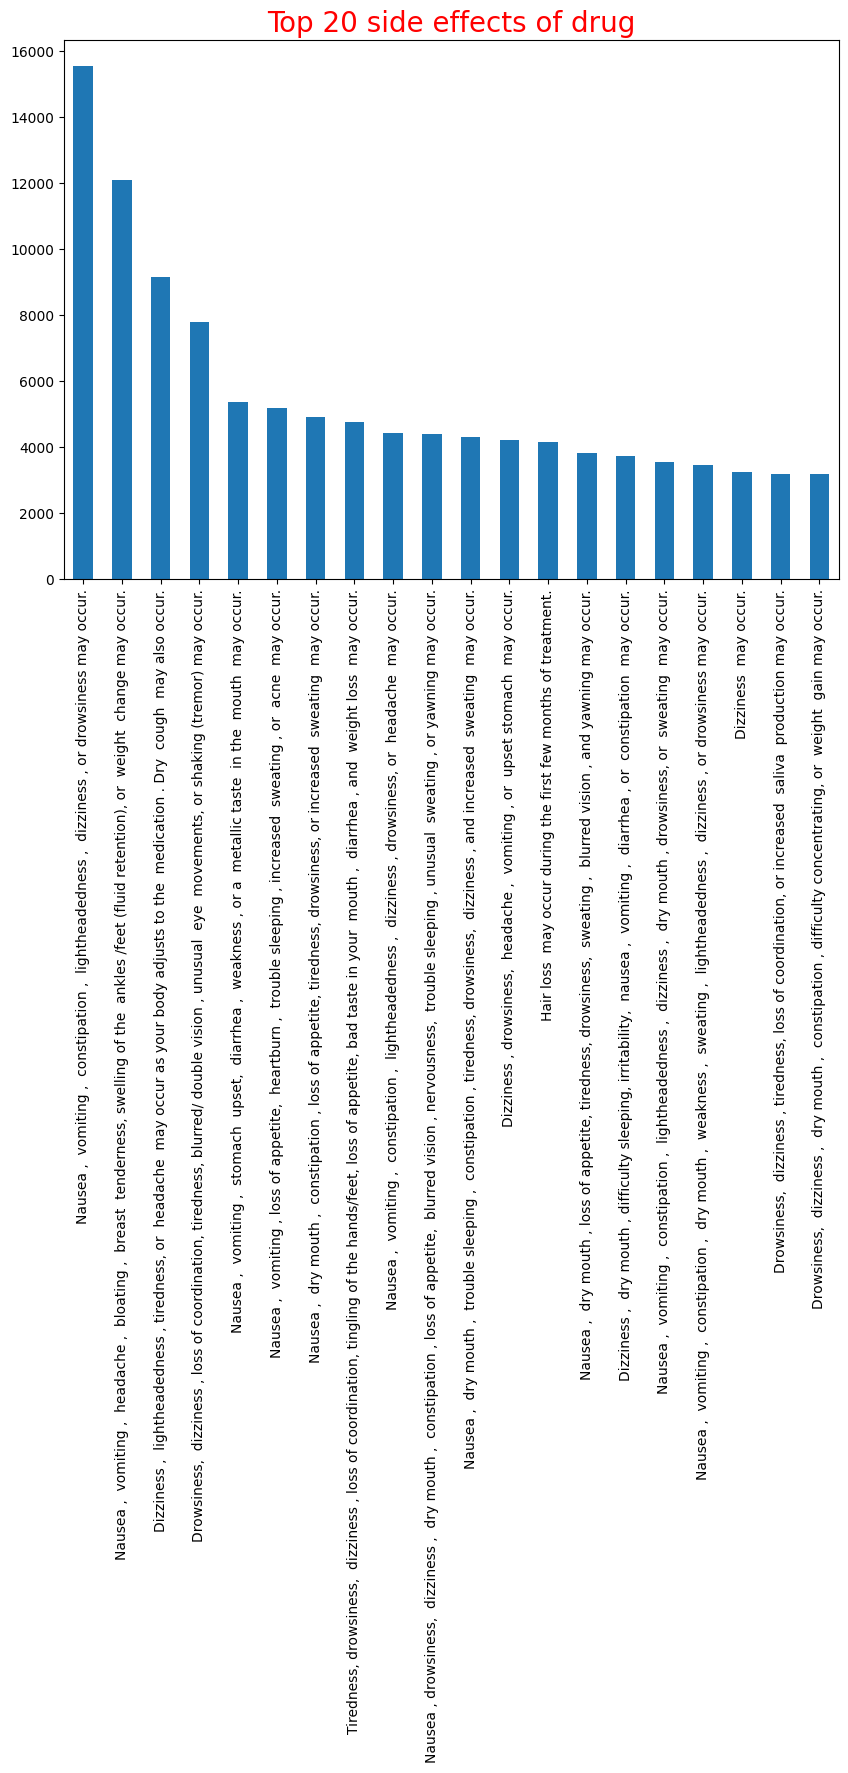

In [169]:
# display top 20 side effects of drug
data['Sides'].value_counts().head(20).plot(kind='bar')
plt.rcParams['figure.figsize'] = (10, 7)
plt.title(label='Top 20 side effects of drug', fontsize=20, color='red');
plt.show()

~ Most commonly found side effects associated with the drug were Nausea, vomiting, constipation, lightheadedness, dizziness, or drowsiness.

In [170]:
# display side effects of medicine in which it is mentioned only once
data[data['Sides'].isin(data['Sides'].value_counts()[data['Sides'].value_counts()<2].index)]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
3330,19-24,Active Tuberculosis,2009-10-09,pyrazinamide,7398,3,4,NaN,4,Female,"Nausea , vomiting , loss of appetite, or mild...",0,2009
6853,65-74,High Amount of Potassium in the Blood,2020-02-15,lokelma 10 gram oral powder packet,175765,4,4,white powder gritty mixes well with water I ha...,4,NaN,"Swelling in your ankles , feet, or hands may ...",0,2020
22145,55-64,Breakthrough Cancer Pain in Opioid-Tolerant Pa...,2016-09-27,"lazanda aerosol, spray with pump",157448,5,5,This is a blessing for my Cancer pain and I do...,5,Female,"Nausea , vomiting , constipation , lighthea...",2,2016
36458,65-74,Increased Pressure in the Eye,2009-08-31,levobunolol hcl drops,4457,1,5,Medication is working but very difficult to pu...,2,NaN,"Temporary burning/stinging of the eye , itchy...",3,2009
38532,25-34,Recurring Sleep Episodes During the Day,2019-06-12,wakix 17.8 mg tablet narcolepsy therapy - h3-r...,178044,5,5,"Wakix has been effective and keeping me awake,...",4,NaN,"Nausea , nervousness, or trouble sleeping ma...",2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360173,65-74,Other,2017-09-04,calcium ascorbate,10417,5,5,Unsure if this is the reason for the vast calc...,5,Male,"Diarrhea , constipation , nausea , vomiting...",6,2017
360248,19-24,Low Amount of Calcium in the Blood,2010-03-20,calcitriol ampul,5917,5,5,This is a good med to take. Its very effectiv...,5,Female,"Nausea , headache , constipation , or pain/d...",0,2010
360306,75 or over,Other,2009-12-13,calcitonin (salmon) solution,11930,1,1,had a bad allergic reaction is the nasal one g...,1,Male,"(See also How to Use section). Nausea , abdom...",1,2009
360320,nan,Other,2016-01-26,"calcipotriene solution, non-",170575,3,3,test Review for Jan Update!,3,NaN,"Burning, stinging, tingling, rash , dry skin...",0,2016


In [171]:
# display last  110 side effects of medicine in which it is mentioned only once
data['Sides'].value_counts().tail(110).to_string()

'Nausea ,  vomiting ,  diarrhea , lip/ mouth  sores, or loss of appetite may occur.                                                                                                                                                                                                                 1\n(See also How to Use section). Nausea ,  abdominal pain ,  diarrhea ,  vomiting , or flushing may occur.                                                                                                                                                                                           1\nNausea ,  vomiting ,  dizziness ,  stomach  upset, and abdominal  cramps  may occur.                                                                                                                                                                                                               1\nNausea ,  vomiting , loss of appetite,  constipation ,  dry mouth , difficulty swallowing, drowsiness,  dizziness ,  

In [172]:
# display row having missing 'Sides'
data[data['Sides'].isna()]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
2,65-74,Other,2012-07-16,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0,2012
3,75 or over,Other,2010-09-23,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,NaN,0,2010
4,35-44,Other,2009-06-01,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1,2009
5,55-64,Other,2008-07-19,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,NaN,0,2008
10,65-74,Other,2016-03-15,pyrogallol crystals,12112,5,5,Excellent in reducing inlamation associated wi...,5,Male,NaN,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361574,25-34,Poisoning from Swallowed Unknown Substance,2010-07-15,"charcoal, activated",948,3,3,It's helped me before.,3,Male,NaN,0,2010
361575,nan,Other,2010-03-03,"charcoal, activated",948,2,2,NaN,2,NaN,NaN,0,2010
361576,75 or over,Gas,2009-12-02,"charcoal, activated",948,3,1,It leaves a bad metalic taste in your mouth th...,1,Male,NaN,0,2009
361577,45-54,Poisoning from Swallowed Unknown Substance,2007-05-11,"charcoal, activated",948,5,5,NaN,5,Male,NaN,3,2007


In [173]:
# display row having missing 'Sides' and  'Condition' as 'Other' 
data[(data['Sides'].isna()) & (data['Condition']=='Other')]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
2,65-74,Other,2012-07-16,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0,2012
3,75 or over,Other,2010-09-23,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,NaN,0,2010
4,35-44,Other,2009-06-01,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1,2009
5,55-64,Other,2008-07-19,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,NaN,0,2008
10,65-74,Other,2016-03-15,pyrogallol crystals,12112,5,5,Excellent in reducing inlamation associated wi...,5,Male,NaN,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361481,55-64,Other,2014-11-21,chloramphenicol palmitate powder,5741,3,4,It works well but it can be a pain to apply. O...,4,Female,NaN,0,2014
361549,35-44,Other,2015-11-16,chemo diluent 1 (pf) solution,89478,1,1,i suffered liquid chili leaving my rectum. it ...,1,Male,NaN,1,2015
361556,nan,Other,2010-05-07,charcocaps,7112,1,1,"taking it for itching. now have constipation,...",1,NaN,NaN,1,2010
361575,nan,Other,2010-03-03,"charcoal, activated",948,2,2,NaN,2,NaN,NaN,0,2010


~ 17460 rows were having missing side effects, out of which 6468 rows were having 'Condition' as 'Other'

**7) AGE**

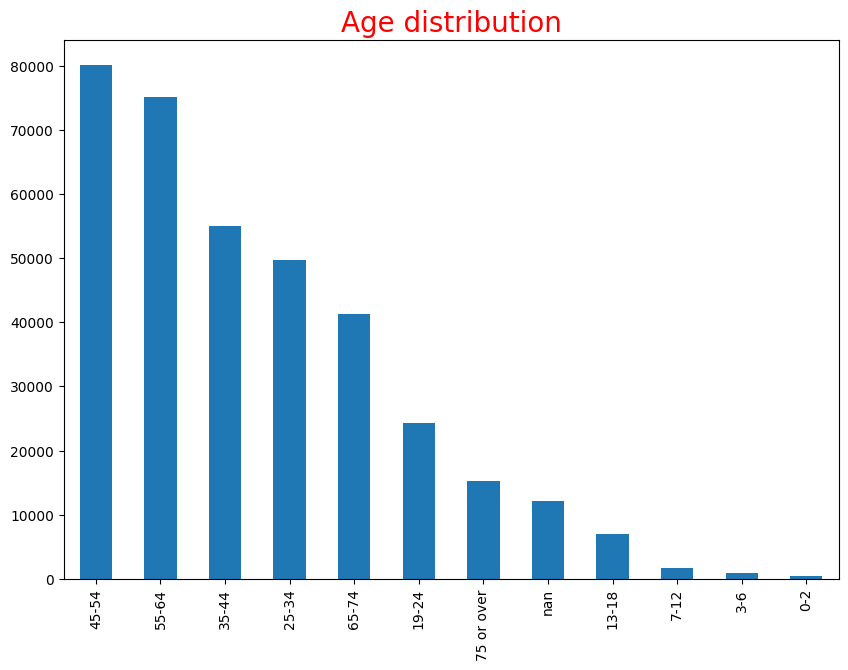

In [174]:
# display distribution of Age
data['Age'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize'] = (10, 7)
plt.title(label='Age distribution', fontsize=20, color='red');
plt.show()

~ Maximum and minimum amount of reviews were obtained from the age group between 45-54 and 0-2.

In [175]:
# display rows having missing 'Age'
data[data['Age']=='nan']

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
12,nan,Birth Control,2018-03-07,lyza,164750,2,1,This stuff needs to be removed from the market...,1,Female,"Nausea , vomiting , headache , bloating , ...",0,2018
73,nan,Abnormally Long or Heavy Periods,2012-03-10,lysteda,154120,5,5,54 YO with uterine fibroids and HEAVY clotting...,5,NaN,"Nausea , vomiting , diarrhea , and muscle p...",10,2012
91,nan,Abnormally Long or Heavy Periods,2012-10-04,lysteda,154120,3,4,I am 45 years old with fibroids. I have had he...,1,Female,"Nausea , vomiting , diarrhea , and muscle p...",18,2012
184,nan,Neuropathic Pain,2020-02-29,lyrica,93965,5,5,No Script or health Insurance needed to place ...,5,NaN,"Drowsiness, dizziness , dry mouth , constip...",12,2020
185,nan,Nerve Pain after Herpes,2020-02-24,lyrica,93965,5,5,After using Lyrica for 3 weeks it really ly wo...,5,Male,"Drowsiness, dizziness , dry mouth , constip...",0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362517,nan,Stop Smoking,2010-03-31,chantix,144470,4,4,my husband and i are on chantix. saturday apri...,4,NaN,"Nausea , headache , vomiting , drowsiness, g...",3,2010
362571,nan,Stop Smoking,2010-01-19,chantix,144470,5,5,NaN,3,NaN,"Nausea , headache , vomiting , drowsiness, g...",0,2010
362598,nan,Stop Smoking,2009-09-12,chantix,144470,5,5,NaN,1,Male,"Nausea , headache , vomiting , drowsiness, g...",1,2009
362645,nan,Stop Smoking,2009-02-26,chantix,144470,5,3,I have just started to take this medication. T...,3,NaN,"Nausea , headache , vomiting , drowsiness, g...",9,2009


In [176]:
# display rows having missing 'Age' and 'Sex'
data[(data['Age']=='nan') & (data['Sex'].isna())] 

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
73,nan,Abnormally Long or Heavy Periods,2012-03-10,lysteda,154120,5,5,54 YO with uterine fibroids and HEAVY clotting...,5,NaN,"Nausea , vomiting , diarrhea , and muscle p...",10,2012
184,nan,Neuropathic Pain,2020-02-29,lyrica,93965,5,5,No Script or health Insurance needed to place ...,5,NaN,"Drowsiness, dizziness , dry mouth , constip...",12,2020
209,nan,Neuropathic Pain,2018-03-13,lyrica,93965,4,2,NaN,4,NaN,"Drowsiness, dizziness , dry mouth , constip...",11,2018
325,nan,Other,2010-04-10,lyrica,93965,4,3,YES IT HELPED WITH THE LATE NIGHT SHAKES FROM ...,3,NaN,"Drowsiness, dizziness , dry mouth , constip...",2,2010
587,nan,Diabetic Complication causing Injury to some B...,2007-11-27,lyrica,93965,5,5,NaN,4,NaN,"Drowsiness, dizziness , dry mouth , constip...",2,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362450,nan,Stop Smoking,2007-11-14,chantix,144470,2,3,Lots of side effects not listed,1,NaN,"Nausea , headache , vomiting , drowsiness, g...",12,2007
362517,nan,Stop Smoking,2010-03-31,chantix,144470,4,4,my husband and i are on chantix. saturday apri...,4,NaN,"Nausea , headache , vomiting , drowsiness, g...",3,2010
362571,nan,Stop Smoking,2010-01-19,chantix,144470,5,5,NaN,3,NaN,"Nausea , headache , vomiting , drowsiness, g...",0,2010
362645,nan,Stop Smoking,2009-02-26,chantix,144470,5,3,I have just started to take this medication. T...,3,NaN,"Nausea , headache , vomiting , drowsiness, g...",9,2009


~ 12202 rows were having 'Age' column missing, out of which 7510 rows were having 'Sex' as missing. 

**8) GENDER**

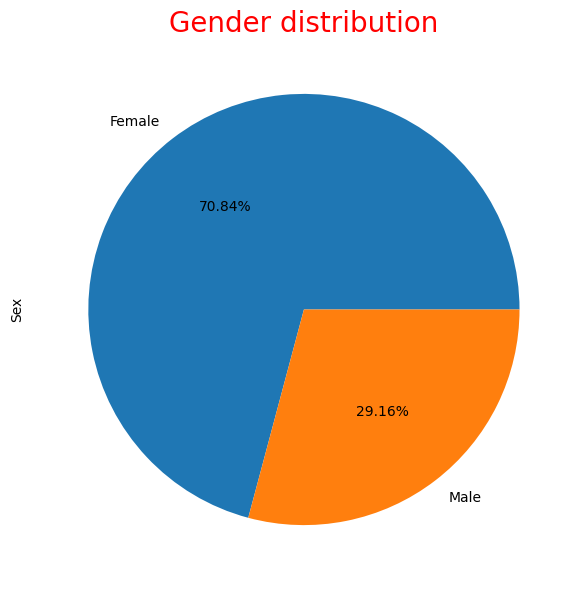

In [177]:
# display distribution of Gender
data['Sex'].value_counts().head(20).plot(kind='pie', autopct = '%1.2f%%')
plt.rcParams['figure.figsize'] = (10, 7)
plt.title(label='Gender distribution', fontsize=20, color='red');
plt.show()

~ Majority of the user reviews were given by females when compared to males.

In [178]:
# display rows having missing 'Gender'
data[data['Sex'].isna()]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
11,19-24,Birth Control,2018-11-17,lyza,164750,5,5,Taking Lyza made me break out HORRIBLY. I trie...,2,NaN,"Nausea , vomiting , headache , bloating , ...",0,2018
14,35-44,Birth Control,2018-02-13,lyza,164750,5,5,I was concerned about starting a bc pill due t...,5,NaN,"Nausea , vomiting , headache , bloating , ...",0,2018
15,25-34,Birth Control,2017-09-12,lyza,164750,2,2,The birth control was very easy to use and it ...,1,NaN,"Nausea , vomiting , headache , bloating , ...",1,2017
17,25-34,Birth Control,2017-09-27,lyza,164750,4,4,IÃ¢??ve been taking Lyza for years now and I a...,1,NaN,"Nausea , vomiting , headache , bloating , ...",1,2017
20,35-44,Birth Control,2016-06-05,lyza,164750,5,5,I took this pill for a month. It was so awful ...,1,NaN,"Nausea , vomiting , headache , bloating , ...",3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362571,nan,Stop Smoking,2010-01-19,chantix,144470,5,5,NaN,3,NaN,"Nausea , headache , vomiting , drowsiness, g...",0,2010
362645,nan,Stop Smoking,2009-02-26,chantix,144470,5,3,I have just started to take this medication. T...,3,NaN,"Nausea , headache , vomiting , drowsiness, g...",9,2009
362673,45-54,Stop Smoking,2009-07-27,chantix,144470,5,5,Was on Chantix for 3 months beginning Feb 07. ...,5,NaN,"Nausea , headache , vomiting , drowsiness, g...",9,2009
362800,55-64,Stop Smoking,2008-11-14,chantix,144470,5,5,"I goofed,it was june 16th of 2007 that I had m...",5,NaN,"Nausea , headache , vomiting , drowsiness, g...",0,2008


**9) USEFUL COUNT**

In [179]:
# sort the dataframe with 'UsefulCount' column and display necessary columns
highest_usefulcount = data.sort_values(by = 'UsefulCount', axis=0, ascending=False)
highest_usefulcount[['UsefulCount', 'Drug', 'Condition', 'Reviews', 'Sides', 'EaseofUse', 'Effectiveness', 'Satisfaction']].head(20)

,UsefulCount,Drug,Condition,Reviews,Sides,EaseofUse,Effectiveness,Satisfaction
148220,255,"reclast bottle, infusion",Other,I have been unable to take any of the osteopor...,"Nausea , tiredness, flu -like symptoms (e.g.,...",5,5,5
235462,222,anastrozole,Breast Cancer,I was diagnosed with with a well differentiate...,"Hot flashes , headache , trouble sleeping , ...",5,5,3
286896,188,hydrocodone-acetaminophen,Pain,I have cronic back pain due to an injury. I ha...,"Nausea , vomiting , constipation , lighthea...",5,4,4
109227,178,prolia syringe,Osteoporosis,Was unable to tolorate Fasomax or Actonel. Si...,NaN,1,1,1
109223,176,prolia syringe,Osteoporosis,Pasta girl here again: Forgot to mention when ...,NaN,1,1,1
108939,169,prolia syringe,Decreased Bone Mass Following Menopause,"Pain worse than I've ever had, skin aged and l...",NaN,1,2,1
251228,166,adderall,Attention Deficit Disorder with Hyperactivity,"I am a 48 y.o university professor, - after y...","Loss of appetite, weight loss , dry mouth , ...",5,5,5
211670,156,viagra,Inability to have an Erection,Very effective. Take without food to help abs...,"Dizziness , headache , flushing, or stomach ...",4,5,4
34701,154,lexapro,Depression,"The doctors don't tell you this, or maybe most...","Nausea , dry mouth , trouble sleeping , con...",5,3,1
315176,145,cymbalta,Major Depressive Disorder,I just started Cymbalta yesterday for the seco...,"Nausea , dry mouth , constipation , loss of ...",5,5,5


~ Rows are displayed with highest number of users who found the review useful for a particular drug. 'reclast bottle, infusion' drug had got the highest 'UsefulCount' indicating that review regarding this particular drug was useful to many users. 

**10) YEAR**

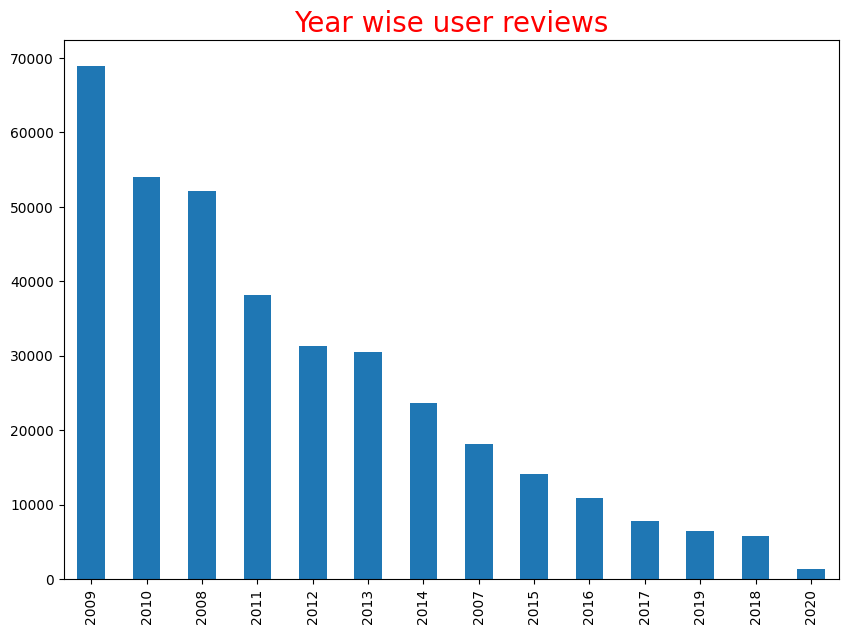

In [180]:
# display distribution of Year
data['Year'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize'] = (10, 7)
plt.title(label='Year wise user reviews', fontsize=20, color='red');
plt.show()

~ User reviews on specific drugs were taken for 13 years from the year 2007 to 2020 with maximum reviews for the year 2009 and minimum reviews for the year 2020.

**11) REVIEWS**

In [181]:
# display top 20 reviews
data['Reviews'].value_counts().head(20)

good                                                                                                                                                                                                                                                                                                                      183
this treatment is awsome.  I love drugs.                                                                                                                                                                                                                                                                                  172
This drug is awesome.  I love drugs.                                                                                                                                                                                                                                                                                      128
No Script or health Insurance needed to place 

### DATA UNDERSTANDING

* Dataset was having 362806 rows and 12 columns.

* User reviews on specific drugs were taken for 13 years from the year 2007 to 2020 with maximum reviews for the year 2009 and minimum reviews for the year 2020.

* Maximum and minimum amount of reviews were obtained from the age group between 45-54 and 0-2.

* Majority of the medicines were used for curing other conditions. When the condition for which the medicine is taken was missing, very less number of users was finding the review useful.

* 'cymbalta' was the most widely used drug, used for curing Anxiousness associated with Depression, Chronic Muscle or Bone Pain, Neuropathic Pain etc.

* Majority of the users had given 5 as rating for Satisfaction, Ease of use and Effectiveness of the drug.

* Majority of the user reviews were given by females when compared to males.

* Most commonly found side effects associated with the drug were Nausea, vomiting, constipation, lightheadedness, dizziness, or drowsiness. 17460 rows were having missing side effects, out of which 6468 rows were having 'Condition' as 'Other'.

* 'reclast bottle, infusion' drug had got the highest 'UsefulCount' indicating that review regarding this particular drug was useful to many users. 

## FILLLING MISSING VALUES

In [182]:
# display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Age            362806 non-null  object        
 1   Condition      362763 non-null  object        
 2   Date           362806 non-null  datetime64[ns]
 3   Drug           362806 non-null  object        
 4   DrugId         362806 non-null  int32         
 5   EaseofUse      362806 non-null  int8          
 6   Effectiveness  362806 non-null  int8          
 7   Reviews        320912 non-null  object        
 8   Satisfaction   362806 non-null  int8          
 9   Sex            336269 non-null  object        
 10  Sides          345346 non-null  object        
 11  UsefulCount    362806 non-null  int16         
 12  Year           362806 non-null  int64         
dtypes: datetime64[ns](1), int16(1), int32(1), int64(1), int8(3), object(6)
memory usage: 25.3+ MB


In [183]:
# count of null values
data.isnull().sum()

Age                  0
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          41894
Satisfaction         0
Sex              26537
Sides            17460
UsefulCount          0
Year                 0
dtype: int64

~ Missing values are present in 'Age', 'Condition', 'Reviews', 'Sex', 'Sides' columns which are of object type. Hence filling missing values with its mode.

### a) AGE COLUMN

In [184]:
# unique values in 'Age' column
data['Age'].unique()

array(['75 or over', '25-34', '65-74', '35-44', '55-64', '45-54', '19-24',
       'nan', '13-18', '7-12', '0-2', '3-6'], dtype=object)

~ missing values in 'Age' column are marked as 'nan'

In [185]:
# mode of 'Age' column
data['Age'].mode()[0]

'45-54'

In [186]:
# replacing missing value in 'Age' column with its mode
data.loc[data.Age == 'nan', 'Age'] = '45-54'

In [187]:
# unique values in 'Age' column
data['Age'].unique()

array(['75 or over', '25-34', '65-74', '35-44', '55-64', '45-54', '19-24',
       '13-18', '7-12', '0-2', '3-6'], dtype=object)

### b) CONDITION COLUMN

In [188]:
# mode of 'Condition' column
data['Condition'].mode()[0]

'Other'

In [189]:
# display rows having missing Condition
data[data['Condition'].isna()]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
31316,35-44,NaN,2010-04-09,lexapro,63990,4,3,i think that's placebo!,3,Male,"Nausea , dry mouth , trouble sleeping , con...",0,2010
37013,45-54,NaN,2008-10-14,levetiracetam tablet for suspension,17855,5,1,NaN,5,NaN,"Drowsiness, dizziness , unusual tiredness, or...",0,2008
37117,45-54,NaN,2008-10-14,levetiracetam,17855,5,1,NaN,5,NaN,"Drowsiness, dizziness , unusual tiredness, or...",0,2008
49273,65-74,NaN,2012-04-14,neurontin,9845,4,4,I finally convinced my shrink at Veterans this...,5,Male,"Drowsiness, dizziness , loss of coordination,...",1,2012
52267,55-64,NaN,2010-01-09,neurontin,9845,3,3,It has helped with my Multiple Sclerosis nerve...,3,Female,"Drowsiness, dizziness , loss of coordination,...",0,2010
63607,75 or over,NaN,2011-11-02,naproxen tablet,5173,1,1,needed 375 mg three times a day for relief. wo...,1,Male,"Upset stomach , nausea , heartburn , headac...",0,2011
63676,75 or over,NaN,2011-11-02,"naproxen suspension, (final dose form)",5173,1,1,needed 375 mg three times a day for relief. wo...,1,Male,"Upset stomach , nausea , heartburn , headac...",0,2011
63722,75 or over,NaN,2011-11-02,naproxen,5173,1,1,needed 375 mg three times a day for relief. wo...,1,Male,"Upset stomach , nausea , heartburn , headac...",0,2011
68864,65-74,NaN,2012-04-14,neurontin capsule,9845,4,4,I finally convinced my shrink at Veterans this...,5,Male,"Drowsiness, dizziness , loss of coordination,...",1,2012
71020,55-64,NaN,2010-01-09,neurontin capsule,9845,3,3,It has helped with my Multiple Sclerosis nerve...,3,Female,"Drowsiness, dizziness , loss of coordination,...",0,2010


In [190]:
# filling missing values in 'Condition' column with its mode
data.loc[data['Condition'].isna(), 'Condition'] = 'Other'

In [191]:
# display rows having missing Condition
data[data['Condition'].isna()]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year


### c) REVIEWS COLUMN

In [192]:
# mode of 'Reviews' column
data['Reviews'].mode()[0]

'good'

In [193]:
# display rows having missing Reviews
data[data['Reviews'].isna()]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
8,25-34,Acne,2016-04-27,wymzya fe,163180,4,2,NaN,2,Female,"Nausea , vomiting , headache , bloating , ...",1,2016
30,55-64,Other,2015-09-08,lysiplex plus liquid,149297,1,1,NaN,1,Female,"Constipation , diarrhea , or upset stomach ...",0,2015
37,75 or over,Dandruff,2017-02-09,pyrithione zinc shampoo,170586,4,3,NaN,4,Female,NaN,0,2017
77,45-54,Abnormally Long or Heavy Periods,2012-07-27,lysteda,154120,4,4,NaN,4,Female,"Nausea , vomiting , diarrhea , and muscle p...",1,2012
129,35-44,Other,2011-08-27,lysteda,154120,4,4,NaN,4,Female,"Nausea , vomiting , diarrhea , and muscle p...",1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362571,45-54,Stop Smoking,2010-01-19,chantix,144470,5,5,NaN,3,NaN,"Nausea , headache , vomiting , drowsiness, g...",0,2010
362579,45-54,Stop Smoking,2010-09-01,chantix,144470,1,1,NaN,1,Female,"Nausea , headache , vomiting , drowsiness, g...",1,2010
362580,35-44,Stop Smoking,2010-08-01,chantix,144470,2,2,NaN,2,Male,"Nausea , headache , vomiting , drowsiness, g...",0,2010
362586,35-44,Stop Smoking,2009-12-23,chantix,144470,5,3,NaN,2,Male,"Nausea , headache , vomiting , drowsiness, g...",0,2009


In [194]:
# filling missing values in 'Reviews' column with its mode
data.loc[data['Reviews'].isna(), 'Reviews'] = 'good'

In [195]:
# display rows having missing Reviews
data[data['Reviews'].isna()]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year


### d) SEX COLUMN

In [196]:
# mode of 'Sex' column
data['Sex'].mode()[0]

'Female'

In [197]:
# display rows having missing Sex
data[data['Sex'].isna()]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
11,19-24,Birth Control,2018-11-17,lyza,164750,5,5,Taking Lyza made me break out HORRIBLY. I trie...,2,NaN,"Nausea , vomiting , headache , bloating , ...",0,2018
14,35-44,Birth Control,2018-02-13,lyza,164750,5,5,I was concerned about starting a bc pill due t...,5,NaN,"Nausea , vomiting , headache , bloating , ...",0,2018
15,25-34,Birth Control,2017-09-12,lyza,164750,2,2,The birth control was very easy to use and it ...,1,NaN,"Nausea , vomiting , headache , bloating , ...",1,2017
17,25-34,Birth Control,2017-09-27,lyza,164750,4,4,IÃ¢??ve been taking Lyza for years now and I a...,1,NaN,"Nausea , vomiting , headache , bloating , ...",1,2017
20,35-44,Birth Control,2016-06-05,lyza,164750,5,5,I took this pill for a month. It was so awful ...,1,NaN,"Nausea , vomiting , headache , bloating , ...",3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362571,45-54,Stop Smoking,2010-01-19,chantix,144470,5,5,good,3,NaN,"Nausea , headache , vomiting , drowsiness, g...",0,2010
362645,45-54,Stop Smoking,2009-02-26,chantix,144470,5,3,I have just started to take this medication. T...,3,NaN,"Nausea , headache , vomiting , drowsiness, g...",9,2009
362673,45-54,Stop Smoking,2009-07-27,chantix,144470,5,5,Was on Chantix for 3 months beginning Feb 07. ...,5,NaN,"Nausea , headache , vomiting , drowsiness, g...",9,2009
362800,55-64,Stop Smoking,2008-11-14,chantix,144470,5,5,"I goofed,it was june 16th of 2007 that I had m...",5,NaN,"Nausea , headache , vomiting , drowsiness, g...",0,2008


In [198]:
# filling missing values in 'Sex' column with its mode
data.loc[data['Sex'].isna(), 'Sex'] = 'Female'

In [199]:
# display rows having missing Sex
data[data['Sex'].isna()]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year


### e) SIDES COLUMN

In [200]:
# mode of 'Sides' column
data['Sides'].mode()[0]

'Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.'

In [201]:
# display rows having missing Sides
data[data['Sides'].isna()]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
2,65-74,Other,2012-07-16,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0,2012
3,75 or over,Other,2010-09-23,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,NaN,0,2010
4,35-44,Other,2009-06-01,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1,2009
5,55-64,Other,2008-07-19,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,NaN,0,2008
10,65-74,Other,2016-03-15,pyrogallol crystals,12112,5,5,Excellent in reducing inlamation associated wi...,5,Male,NaN,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361574,25-34,Poisoning from Swallowed Unknown Substance,2010-07-15,"charcoal, activated",948,3,3,It's helped me before.,3,Male,NaN,0,2010
361575,45-54,Other,2010-03-03,"charcoal, activated",948,2,2,good,2,Female,NaN,0,2010
361576,75 or over,Gas,2009-12-02,"charcoal, activated",948,3,1,It leaves a bad metalic taste in your mouth th...,1,Male,NaN,0,2009
361577,45-54,Poisoning from Swallowed Unknown Substance,2007-05-11,"charcoal, activated",948,5,5,good,5,Male,NaN,3,2007


In [202]:
# filling missing values in 'Sides' column with its mode
data.loc[data['Sides'].isna(), 'Sides'] = 'Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.'

In [203]:
# display rows having missing Sides
data[data['Sides'].isna()]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year


In [204]:
# side effects of medicine in which it is mentioned only once, store it in a dataframe
data3 = data[data['Sides'].isin(data['Sides'].value_counts()[data['Sides'].value_counts()<2].index)]

In [205]:
# count of rows having side effects of medicine mentioned only once
len(data3)

110

In [206]:
# converting a specific column to a list
data3['Sides'].to_list()

['Nausea ,  vomiting , loss of appetite, or mild muscle/ joint pain  may occur.',
 'Swelling in your  ankles , feet, or hands may occur.',
 'Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , drowsiness, fever, or  headache  may occur.',
 'Temporary burning/stinging of the  eye , itchy/red  eyes ,  headache , or  dizziness  may occur.',
 'Nausea , nervousness, or  trouble sleeping  may occur.',
 'Dizziness , decreased appetite, or  constipation  may occur.',
 'Mild irritation at the injection site may occur.',
 'Flushing of the face and neck along with warmth,  headache ,  itching , burning,  sweating , chills, or tingling may occur within 20 minutes of taking this  medication . Flushing may persist for a few hours after use.',
 'Infusion reactions (such as flushing,  itching ),  nausea , or  headache  may occur.',
 'Nausea , gas, or  diarrhea  may occur.',
 'The suspension may cause  headache ,  upset stomach , or  diarrhea . If any of these effects occur, tell your 

In [207]:
# converting a specific column to a list and storing it in a variable
sides_1list = data3['Sides'].to_list()

In [208]:
# display 
sides_1list

['Nausea ,  vomiting , loss of appetite, or mild muscle/ joint pain  may occur.',
 'Swelling in your  ankles , feet, or hands may occur.',
 'Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , drowsiness, fever, or  headache  may occur.',
 'Temporary burning/stinging of the  eye , itchy/red  eyes ,  headache , or  dizziness  may occur.',
 'Nausea , nervousness, or  trouble sleeping  may occur.',
 'Dizziness , decreased appetite, or  constipation  may occur.',
 'Mild irritation at the injection site may occur.',
 'Flushing of the face and neck along with warmth,  headache ,  itching , burning,  sweating , chills, or tingling may occur within 20 minutes of taking this  medication . Flushing may persist for a few hours after use.',
 'Infusion reactions (such as flushing,  itching ),  nausea , or  headache  may occur.',
 'Nausea , gas, or  diarrhea  may occur.',
 'The suspension may cause  headache ,  upset stomach , or  diarrhea . If any of these effects occur, tell your 

In [209]:
# From the side effects of medicine which is mentioned only once, display rows where 'Nausea' is mentioned and store it in a list 
a = []
for i in sides_1list:
    if i.__contains__("Nausea")|i.__contains__("nausea"):
        print(f"{i}")
        a.append(i)

Nausea ,  vomiting , loss of appetite, or mild muscle/ joint pain  may occur.
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , drowsiness, fever, or  headache  may occur.
Nausea , nervousness, or  trouble sleeping  may occur.
Infusion reactions (such as flushing,  itching ),  nausea , or  headache  may occur.
Nausea , gas, or  diarrhea  may occur.
Nausea ,  vomiting ,  weakness , loss of appetite,  diarrhea , or pain/swelling/redness at injection site may occur.
Tiredness, abnormal taste,  hair loss ,  headache ,  weight loss ,  nausea / vomiting ,  diarrhea ,  stomach / abdominal pain , mild  itching , or decreased appetite may occur.
Headache , flushing,  dizziness , drowsiness,  nausea ,  vomiting , loss of appetite,  diarrhea ,  constipation , sensitive  skin , or  flu -like symptoms (such as  sore throat ,  cough , body aches) may occur.
Nausea ,  vomiting ,  diarrhea , lip/ mouth  sores, or loss of appetite may occur.
Dizziness ,  diarrhea ,  nausea / vomiting

In [210]:
# From the side effects of medicine which is mentioned only once, filtering out side effects other than 'Nausea'
other_sides = [feature for feature in sides_1list if feature not in a]
other_sides

['Swelling in your  ankles , feet, or hands may occur.',
 'Temporary burning/stinging of the  eye , itchy/red  eyes ,  headache , or  dizziness  may occur.',
 'Dizziness , decreased appetite, or  constipation  may occur.',
 'Mild irritation at the injection site may occur.',
 'Flushing of the face and neck along with warmth,  headache ,  itching , burning,  sweating , chills, or tingling may occur within 20 minutes of taking this  medication . Flushing may persist for a few hours after use.',
 'The suspension may cause  headache ,  upset stomach , or  diarrhea . If any of these effects occur, tell your doctor or  pharmacist  promptly and discuss switching to other forms of  nitisinone .',
 'Temporary redness, stinging, or irritation at the application site may occur.',
 'Tiredness,  mouth /throat pain, or fast/pounding heartbeat may occur.',
 'Stuffy/ runny nose ,  cough ,  sore throat , or  sneezing  may occur.',
 'Darkening  skin  or  dry mouth  may occur.',
 'Dizziness ,  lightheade

In [211]:
# side effects of medicine which  is mentioned only once, grouping into various classifications
for side in data['Sides'].unique():
    if side=='Nausea ,  vomiting , loss of appetite, or mild muscle/ joint pain  may occur.': 
        data['Sides'].replace({'Nausea ,  vomiting , loss of appetite, or mild muscle/ joint pain  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , drowsiness, fever, or  headache  may occur.':
        data['Sides'].replace({'Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , drowsiness, fever, or  headache  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea , nervousness, or  trouble sleeping  may occur.':
        data['Sides'].replace({'Nausea , nervousness, or  trouble sleeping  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Infusion reactions (such as flushing,  itching ),  nausea , or  headache  may occur.':
        data['Sides'].replace({'Infusion reactions (such as flushing,  itching ),  nausea , or  headache  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea , gas, or  diarrhea  may occur.':
        data['Sides'].replace({'Nausea , gas, or  diarrhea  may occur.':'Nausea etc.'},inplace=True) 
    elif side=='Nausea ,  vomiting ,  weakness , loss of appetite,  diarrhea , or pain/swelling/redness at injection site may occur.':
        data['Sides'].replace({'Nausea ,  vomiting ,  weakness , loss of appetite,  diarrhea , or pain/swelling/redness at injection site may occur.':'Nausea etc.'},inplace=True) 
    elif side=='Tiredness, abnormal taste,  hair loss ,  headache ,  weight loss ,  nausea / vomiting ,  diarrhea ,  stomach / abdominal pain , mild  itching , or decreased appetite may occur.':
        data['Sides'].replace({'Tiredness, abnormal taste,  hair loss ,  headache ,  weight loss ,  nausea / vomiting ,  diarrhea ,  stomach / abdominal pain , mild  itching , or decreased appetite may occur.':'Nausea etc.'},inplace=True)
    elif side=='Headache , flushing,  dizziness , drowsiness,  nausea ,  vomiting , loss of appetite,  diarrhea ,  constipation , sensitive  skin , or  flu -like symptoms (such as  sore throat ,  cough , body aches) may occur.':
        data['Sides'].replace({'Headache , flushing,  dizziness , drowsiness,  nausea ,  vomiting , loss of appetite,  diarrhea ,  constipation , sensitive  skin , or  flu -like symptoms (such as  sore throat ,  cough , body aches) may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting ,  diarrhea , lip/ mouth  sores, or loss of appetite may occur.':
        data['Sides'].replace({'Nausea ,  vomiting ,  diarrhea , lip/ mouth  sores, or loss of appetite may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting ,  diarrhea , fever, chills,  abdominal pain , flushing, and  dizziness  may occur.':
        data['Sides'].replace({'Nausea ,  vomiting ,  diarrhea , fever, chills,  abdominal pain , flushing, and  dizziness  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting , loss of appetite,  constipation ,  dry mouth , difficulty swallowing, drowsiness,  dizziness ,  headache ,  trouble sleeping , muscle/ joint pain , or darkening of the  skin  may occur.':
        data['Sides'].replace({'Nausea ,  vomiting , loss of appetite,  constipation ,  dry mouth , difficulty swallowing, drowsiness,  dizziness ,  headache ,  trouble sleeping , muscle/ joint pain , or darkening of the  skin  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting ,  dizziness ,  stomach  upset, and abdominal  cramps  may occur.':
        data['Sides'].replace({'Nausea ,  vomiting ,  dizziness ,  stomach  upset, and abdominal  cramps  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Stomach  upset,  nausea ,  vomiting , loss of appetite, or  headache  may occur.':
        data['Sides'].replace({'Stomach  upset,  nausea ,  vomiting , loss of appetite, or  headache  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting , loss of appetite, unusual taste/dryness in the  mouth ,  dizziness ,  diarrhea , or redness/pain/leakage at the injection site may occur.':
        data['Sides'].replace({'Nausea ,  vomiting , loss of appetite, unusual taste/dryness in the  mouth ,  dizziness ,  diarrhea , or redness/pain/leakage at the injection site may occur.':'Nausea etc.'},inplace=True)
    elif side=='Headache ,  nausea ,  vomiting ,  diarrhea ,  dizziness , drowsiness, numbness/tingling, or  trouble sleeping  may occur.':
        data['Sides'].replace({'Headache ,  nausea ,  vomiting ,  diarrhea ,  dizziness , drowsiness, numbness/tingling, or  trouble sleeping  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea / vomiting ,  diarrhea ,  stomach / abdominal pain ,  mouth  sores,  constipation ,  hemorrhoids ,  headache ,  dizziness , tiredness, muscle/ joint pain , or  trouble sleeping  may occur.':
        data['Sides'].replace({'Nausea / vomiting ,  diarrhea ,  stomach / abdominal pain ,  mouth  sores,  constipation ,  hemorrhoids ,  headache ,  dizziness , tiredness, muscle/ joint pain , or  trouble sleeping  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting , loss of appetite, abdominal  cramps ,  diarrhea , and  heartburn  may occur.':
        data['Sides'].replace({'Nausea ,  vomiting , loss of appetite, abdominal  cramps ,  diarrhea , and  heartburn  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  diarrhea , and  upset stomach  may occur as your body adjusts to the  metformin .':
        data['Sides'].replace({'Nausea ,  diarrhea , and  upset stomach  may occur as your body adjusts to the  metformin .':'Nausea etc.'},inplace=True)
    elif side=='Headache ,  hair loss ,  dizziness ,  diarrhea ,  constipation ,  nausea ,  vomiting ,  muscle pain , swelling of arms/legs, and redness/pain/swelling/ itching /bleeding at injection site may occur.':
        data['Sides'].replace({'Headache ,  hair loss ,  dizziness ,  diarrhea ,  constipation ,  nausea ,  vomiting ,  muscle pain , swelling of arms/legs, and redness/pain/swelling/ itching /bleeding at injection site may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  lightheadedness ,  dizziness , or a feeling of spinning may occur.':
        data['Sides'].replace({'Nausea ,  lightheadedness ,  dizziness , or a feeling of spinning may occur.':'Nausea etc.'},inplace=True)
    elif side=='Dizziness ,  lightheadedness ,  diarrhea ,  nausea ,  vomiting ,  bloating /gas,  headache ,  weakness , or increased urination may occur.':
        data['Sides'].replace({'Dizziness ,  lightheadedness ,  diarrhea ,  nausea ,  vomiting ,  bloating /gas,  headache ,  weakness , or increased urination may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting ,  diarrhea , abdominal/ stomach pain ,  cough ,  dizziness ,  headache , flushing, or loss of appetite may occur.':
        data['Sides'].replace({'Nausea ,  vomiting ,  diarrhea , abdominal/ stomach pain ,  cough ,  dizziness ,  headache , flushing, or loss of appetite may occur.':'Nausea etc.'},inplace=True)
    elif side=='Headache ,  nausea , chills, or fever may occur.':
        data['Sides'].replace({'Headache ,  nausea , chills, or fever may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting ,  stomach / abdominal pain , gas,  diarrhea ,  weight loss ,  headache ,  muscle cramps ,  dizziness , or  weakness  may occur.':
        data['Sides'].replace({'Nausea ,  vomiting ,  stomach / abdominal pain , gas,  diarrhea ,  weight loss ,  headache ,  muscle cramps ,  dizziness , or  weakness  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Drowsiness,  dizziness ,  headache ,  nausea ,  vomiting , loss of appetite,  constipation ,  stomach  upset,  blurred vision , decreased coordination, and  dry mouth /nose/throat may occur.':
        data['Sides'].replace({'Drowsiness,  dizziness ,  headache ,  nausea ,  vomiting , loss of appetite,  constipation ,  stomach  upset,  blurred vision , decreased coordination, and  dry mouth /nose/throat may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting ,  diarrhea , tiredness, loss of appetite,  weakness , and fever may occur.':
        data['Sides'].replace({'Nausea ,  vomiting ,  diarrhea , tiredness, loss of appetite,  weakness , and fever may occur.':'Nausea etc.'},inplace=True)
    elif side=='Stomach  upset/fullness,  nausea ,  headache , and  weight  gain may occur.':
        data['Sides'].replace({'Stomach  upset/fullness,  nausea ,  headache , and  weight  gain may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting , loss of appetite,  mouth  sores, changes in taste,  constipation , tiredness,  dizziness ,  trouble sleeping ,  headache , or pain/redness/swelling at the injection site may occur.':
        data['Sides'].replace({'Nausea ,  vomiting , loss of appetite,  mouth  sores, changes in taste,  constipation , tiredness,  dizziness ,  trouble sleeping ,  headache , or pain/redness/swelling at the injection site may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting ,  upset stomach , loss of appetite,  weight loss ,  constipation , tiredness/ weakness ,  headache , or change in how food tastes may occur.':
        data['Sides'].replace({'Nausea ,  vomiting ,  upset stomach , loss of appetite,  weight loss ,  constipation , tiredness/ weakness ,  headache , or change in how food tastes may occur.':'Nausea etc.'},inplace=True)
    elif side=='Diarrhea ,  nausea , drowsiness,  dizziness ,  headache  or  vomiting  may occur.':
        data['Sides'].replace({'Diarrhea ,  nausea , drowsiness,  dizziness ,  headache  or  vomiting  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Hoarseness, changes in your voice,  nausea ,  diarrhea ,  headache , tiredness, decreased  weight , or muscle/ joint pain  may occur.':
        data['Sides'].replace({'Hoarseness, changes in your voice,  nausea ,  diarrhea ,  headache , tiredness, decreased  weight , or muscle/ joint pain  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting ,  diarrhea ,  constipation ,  stomach  upset,  dizziness , or pain/ itching /swelling at injection site may occur.':
        data['Sides'].replace({'Nausea ,  vomiting ,  diarrhea ,  constipation ,  stomach  upset,  dizziness , or pain/ itching /swelling at injection site may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting ,  diarrhea ,  dizziness ,  headache , or unusual tiredness may occur.':
        data['Sides'].replace({'Nausea ,  vomiting ,  diarrhea ,  dizziness ,  headache , or unusual tiredness may occur.':'Nausea etc.'},inplace=True)
    elif side=='Hot flashes , tiredness,  joint pain ,  nausea , decreased appetite,  weight loss , or decreased sexual interest/ability may occur.':
        data['Sides'].replace({'Hot flashes , tiredness,  joint pain ,  nausea , decreased appetite,  weight loss , or decreased sexual interest/ability may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting ,  diarrhea , abdominal/ stomach pain , increased  saliva , strange  metallic taste  in the  mouth , loss of appetite, or sores in the  mouth  may occur.':
        data['Sides'].replace({'Nausea ,  vomiting ,  diarrhea , abdominal/ stomach pain , increased  saliva , strange  metallic taste  in the  mouth , loss of appetite, or sores in the  mouth  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting , loss of appetite, flushing,  dry skin ,  headache , leg  cramps , decreased sexual interest/ability, and male  breast  tenderness/enlargement may occur.':
        data['Sides'].replace({'Nausea ,  vomiting , loss of appetite, flushing,  dry skin ,  headache , leg  cramps , decreased sexual interest/ability, and male  breast  tenderness/enlargement may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting , tiredness, loss of appetite,  diarrhea ,  weight loss , swelling hands/ ankles /feet, or  weakness  may occur.':
        data['Sides'].replace({'Nausea ,  vomiting , tiredness, loss of appetite,  diarrhea ,  weight loss , swelling hands/ ankles /feet, or  weakness  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Drowsiness,  dizziness ,  lightheadedness ,  nausea ,  vomiting , or  constipation  may occur.':
        data['Sides'].replace({'Drowsiness,  dizziness ,  lightheadedness ,  nausea ,  vomiting , or  constipation  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Pain/soreness/redness/swelling at the injection site, fever,  headache , tiredness,  sore throat ,  nausea ,  diarrhea , loss of appetite, and  dizziness  may occur.':
        data['Sides'].replace({'Pain/soreness/redness/swelling at the injection site, fever,  headache , tiredness,  sore throat ,  nausea ,  diarrhea , loss of appetite, and  dizziness  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Pain/redness/swelling at the injection site, fever, tiredness,  headache ,  nausea , and  diarrhea  may occur.':
        data['Sides'].replace({'Pain/redness/swelling at the injection site, fever, tiredness,  headache ,  nausea , and  diarrhea  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting , tiredness, and loss of appetite may occur.':
        data['Sides'].replace({'Nausea ,  vomiting , tiredness, and loss of appetite may occur.':'Nausea etc.'},inplace=True)
    elif side=='Numbness/tingling, change in the sense of taste,  nausea ,  diarrhea ,  weight loss ,  muscle spasms / twitching , tiredness,  dizziness , or drowsiness may occur.':
        data['Sides'].replace({'Numbness/tingling, change in the sense of taste,  nausea ,  diarrhea ,  weight loss ,  muscle spasms / twitching , tiredness,  dizziness , or drowsiness may occur.':'Nausea etc.'},inplace=True)
    elif side=='Dizziness ,  headache , and  nausea  may occur.':
        data['Sides'].replace({'Dizziness ,  headache , and  nausea  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Stomach  upset,  nausea ,  diarrhea , or drowsiness may occur.':
        data['Sides'].replace({'Stomach  upset,  nausea ,  diarrhea , or drowsiness may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness,  acne , or  weight  gain may occur.':
        data['Sides'].replace({'Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness,  acne , or  weight  gain may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  heartburn ,  constipation , shaking (tremor), swelling  ankles /feet/hands, or  dizziness  may occur.':
        data['Sides'].replace({'Nausea ,  heartburn ,  constipation , shaking (tremor), swelling  ankles /feet/hands, or  dizziness  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Pain at injection site, chills, tingling, flushing,  headache ,  nausea , or  vomiting  may occur.':
        data['Sides'].replace({'Pain at injection site, chills, tingling, flushing,  headache ,  nausea , or  vomiting  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  stomach pain ,  diarrhea ,  constipation , or pain/redness at the injection site may occur.':
        data['Sides'].replace({'Nausea ,  stomach pain ,  diarrhea ,  constipation , or pain/redness at the injection site may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting ,  headache , runny/stuffy nose, nose/throat  itching , or watery  eyes  may occur.':
        data['Sides'].replace({'Nausea ,  vomiting ,  headache , runny/stuffy nose, nose/throat  itching , or watery  eyes  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  vomiting ,  stomach / abdominal pain , or  joint pain  may occur.':
        data['Sides'].replace({'Nausea ,  vomiting ,  stomach / abdominal pain , or  joint pain  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Diarrhea ,  constipation ,  abdominal pain / cramps ,  nausea ,  vomiting , gas, or  bloating  may occur.':
        data['Sides'].replace({'Diarrhea ,  constipation ,  abdominal pain / cramps ,  nausea ,  vomiting , gas, or  bloating  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Tiredness,  weakness ,  nausea , or arm/leg/hand/ foot pain  may occur.':
        data['Sides'].replace({'Tiredness,  weakness ,  nausea , or arm/leg/hand/ foot pain  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  headache , and  diarrhea  may occur.':
        data['Sides'].replace({'Nausea ,  headache , and  diarrhea  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Coughing , stuffy nose,  sneezing ,  headache ,  nausea , or tearing may occur.':
        data['Sides'].replace({'Coughing , stuffy nose,  sneezing ,  headache ,  nausea , or tearing may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  upset stomach ,  abdominal pain , gas/ bloating ,  diarrhea ,  headache ,  back pain , arm/ leg pain ,  dizziness , or  weakness  may occur.':
        data['Sides'].replace({'Nausea ,  upset stomach ,  abdominal pain , gas/ bloating ,  diarrhea ,  headache ,  back pain , arm/ leg pain ,  dizziness , or  weakness  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Constipation ,  nausea ,  headache ,  diarrhea ,  vomiting ,  stomach  upset, gas,  dizziness , drowsiness,  trouble sleeping , tremor, or redness/swelling at the injection site may occur.':
        data['Sides'].replace({'Constipation ,  nausea ,  headache ,  diarrhea ,  vomiting ,  stomach  upset, gas,  dizziness , drowsiness,  trouble sleeping , tremor, or redness/swelling at the injection site may occur.':'Nausea etc.'},inplace=True)
    elif side=='Diarrhea ,  constipation ,  nausea ,  vomiting , abdominal  cramps /pain, or  heartburn  may occur.':
        data['Sides'].replace({'Diarrhea ,  constipation ,  nausea ,  vomiting , abdominal  cramps /pain, or  heartburn  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Nausea ,  headache ,  constipation , or pain/discomfort at the injection site may occur.':
        data['Sides'].replace({'Nausea ,  headache ,  constipation , or pain/discomfort at the injection site may occur.':'Nausea etc.'},inplace=True)
    elif side=='(See also How to Use section). Nausea ,  abdominal pain ,  diarrhea ,  vomiting , or flushing may occur.':
        data['Sides'].replace({'(See also How to Use section). Nausea ,  abdominal pain ,  diarrhea ,  vomiting , or flushing may occur.':'Nausea etc.'},inplace=True)
    elif side=='Diarrhea ,  nausea , or  heartburn  may occur.':
        data['Sides'].replace({'Diarrhea ,  nausea , or  heartburn  may occur.':'Nausea etc.'},inplace=True)
    elif side=='Temporary burning/stinging of the  eye , itchy/red  eyes ,  headache , or  dizziness  may occur.':
        data['Sides'].replace({'Temporary burning/stinging of the  eye , itchy/red  eyes ,  headache , or  dizziness  may occur.':'Stinging of the eyes etc.'},inplace=True)
    elif side=='Temporary stinging/discomfort of the  eye , watery/dry/itchy/red  eyes ,  blurred vision , feeling as if something is in the  eye ,  headache ,  trouble sleeping , or  dizziness  may occur.':
        data['Sides'].replace({'Temporary stinging/discomfort of the  eye , watery/dry/itchy/red  eyes ,  blurred vision , feeling as if something is in the  eye ,  headache ,  trouble sleeping , or  dizziness  may occur.':'Stinging of the eyes etc.'},inplace=True)
    elif side=='Stinging/burning of the  eyes  for 1 to 2 minutes and temporary  blurred vision  may occur when you apply this  medication . Watery  eyes  may also occur.':
        data['Sides'].replace({'Stinging/burning of the  eyes  for 1 to 2 minutes and temporary  blurred vision  may occur when you apply this  medication . Watery  eyes  may also occur.':'Stinging of the eyes etc.'},inplace=True)
    elif side=='Dizziness , decreased appetite, or  constipation  may occur.':
        data['Sides'].replace({'Dizziness , decreased appetite, or  constipation  may occur.':'Dizziness, constipation etc.'},inplace=True)
    elif side=='Drowsiness,  dizziness ,  headache , irritability,  stomach  upset,  vision  changes (e.g.,  blurred vision ), decreased coordination,  constipation , or  dry mouth /nose/throat may occur.':
        data['Sides'].replace({'Drowsiness,  dizziness ,  headache , irritability,  stomach  upset,  vision  changes (e.g.,  blurred vision ), decreased coordination,  constipation , or  dry mouth /nose/throat may occur.':'Dizziness, constipation etc.'},inplace=True)
    elif side=='Flushing of the face and neck along with warmth,  headache ,  itching , burning,  sweating , chills, or tingling may occur within 20 minutes of taking this  medication . Flushing may persist for a few hours after use.':
        data['Sides'].replace({'Flushing of the face and neck along with warmth,  headache ,  itching , burning,  sweating , chills, or tingling may occur within 20 minutes of taking this  medication . Flushing may persist for a few hours after use.':'Flushing of the upper body etc.'},inplace=True)
    elif side=='Flushing of the upper body may occur if this  medication  is injected too fast ("red man syndrome").':
        data['Sides'].replace({'Flushing of the upper body may occur if this  medication  is injected too fast ("red man syndrome").':'Flushing of the upper body etc.'},inplace=True)
    elif side=='The suspension may cause  headache ,  upset stomach , or  diarrhea . If any of these effects occur, tell your doctor or  pharmacist  promptly and discuss switching to other forms of  nitisinone .':
        data['Sides'].replace({'The suspension may cause  headache ,  upset stomach , or  diarrhea . If any of these effects occur, tell your doctor or  pharmacist  promptly and discuss switching to other forms of  nitisinone .':'Headache, diarrhea etc.'},inplace=True)
    elif side=='Diarrhea ,  headache ,  mouth  pain/sores,  runny nose , voice changes,  weight loss ,  weakness , tiredness, or darkening of the  skin  may occur.':
        data['Sides'].replace({'Diarrhea ,  headache ,  mouth  pain/sores,  runny nose , voice changes,  weight loss ,  weakness , tiredness, or darkening of the  skin  may occur.':'Headache, diarrhea etc.'},inplace=True)
    elif side=='Headache ,  diarrhea ,  runny nose ,  sore throat ,  joint / muscle pain , or  trouble sleeping  may occur.':
        data['Sides'].replace({'Headache ,  diarrhea ,  runny nose ,  sore throat ,  joint / muscle pain , or  trouble sleeping  may occur.':'Headache, diarrhea etc.'},inplace=True)
    elif side=='Temporary redness, stinging, or irritation at the application site may occur.':
        data['Sides'].replace({'Temporary redness, stinging, or irritation at the application site may occur.':'Irritation at the application site may occur etc.'},inplace=True)
    elif side=='Redness, mild  itching , or irritation at the application site may occur.':
        data['Sides'].replace({'Redness, mild  itching , or irritation at the application site may occur.':'Irritation at the application site may occur etc.'},inplace=True)
    elif side=='Burning, stinging, tingling,  rash ,  dry skin , or irritation at the application site may occur.':
        data['Sides'].replace({'Burning, stinging, tingling,  rash ,  dry skin , or irritation at the application site may occur.':'Irritation at the application site may occur etc.'},inplace=True)
    elif side=='Stuffy/ runny nose ,  cough ,  sore throat , or  sneezing  may occur.':
        data['Sides'].replace({'Stuffy/ runny nose ,  cough ,  sore throat , or  sneezing  may occur.':'Stuffy nose etc.'},inplace=True)
    elif side=='Dizziness ,  lightheadedness , drowsiness,  headache , stuffy nose, and  weakness  may occur as your body adjusts to the  medication . If any of these effects persist or worsen, tell your doctor or  pharmacist  promptly.':
        data['Sides'].replace({'Dizziness ,  lightheadedness , drowsiness,  headache , stuffy nose, and  weakness  may occur as your body adjusts to the  medication . If any of these effects persist or worsen, tell your doctor or  pharmacist  promptly.':'Stuffy nose etc.'},inplace=True)
    elif side=='Darkening  skin  or  dry mouth  may occur.':
        data['Sides'].replace({'Darkening  skin  or  dry mouth  may occur.':'Discoloration of the  skin etc.'},inplace=True)
    elif side=='Discoloration of the  skin  or pain, tenderness, or swelling along your veins may occur.':
        data['Sides'].replace({'Discoloration of the  skin  or pain, tenderness, or swelling along your veins may occur.':'Discoloration of the  skin etc.'},inplace=True)
    elif side=='Redness, swelling, or lightening of the  skin  may occur.':
        data['Sides'].replace({'Redness, swelling, or lightening of the  skin  may occur.':'Discoloration of the  skin etc.'},inplace=True)
    elif side=='Pain at the injection site  dizziness ,  lightheadedness ,  weakness ,  muscle cramps ,  upset stomach , or  diarrhea  may occur.':
        data['Sides'].replace({'Pain at the injection site  dizziness ,  lightheadedness ,  weakness ,  muscle cramps ,  upset stomach , or  diarrhea  may occur.':'Pain at the injection site etc.'},inplace=True)
    elif side=='Pain/redness/warmth/bruising/swelling at the injection site, tiredness, fever, or  headache  may occur.':
        data['Sides'].replace({'Pain/redness/warmth/bruising/swelling at the injection site, tiredness, fever, or  headache  may occur.':'Pain at the injection site etc.'},inplace=True)
    elif side=='Pain, bruising,  itching , redness, or swelling at the injection site may occur.':
        data['Sides'].replace({'Pain, bruising,  itching , redness, or swelling at the injection site may occur.':'Pain at the injection site etc.'},inplace=True)
    elif side=='Pain/redness/swelling at the injection site, limited arm movement, muscle ache,  headache , or tiredness may occur.':
        data['Sides'].replace({'Pain/redness/swelling at the injection site, limited arm movement, muscle ache,  headache , or tiredness may occur.':'Pain at the injection site etc.'},inplace=True)
    elif side=='Redness, pain, or tenderness at the injection site may occur.':
        data['Sides'].replace({'Redness, pain, or tenderness at the injection site may occur.':'Pain at the injection site etc.'},inplace=True)
    elif side=='Pain/swelling/redness at the injection site may occur.':
        data['Sides'].replace({'Pain/swelling/redness at the injection site may occur.':'Pain at the injection site etc.'},inplace=True)
    elif side=='Mild  skin  burning, redness, and peeling of the treated area may occur as expected.':
        data['Sides'].replace({'Mild  skin  burning, redness, and peeling of the treated area may occur as expected.':'redness, and peeling of the skin etc.'},inplace=True)
    elif side=='Skin  reactions such as peeling,  itching , irritation, and redness may occur, especially at the start of treatment.':
        data['Sides'].replace({'Skin  reactions such as peeling,  itching , irritation, and redness may occur, especially at the start of treatment.':'redness, and peeling of the skin etc.'},inplace=True)
    elif side=='Stomach  upset or  diarrhea  may occur.':
        data['Sides'].replace({'Stomach  upset or  diarrhea  may occur.':'Stomach  upset,  diarrhea etc.'},inplace=True)
    elif side=='Stomach  upset,  diarrhea , or  bloating  may occur.':
        data['Sides'].replace({'Stomach  upset,  diarrhea , or  bloating  may occur.':'Stomach  upset,  diarrhea etc.'},inplace=True)
    elif side=='Pain at the injection site,  dizziness ,  lightheadedness ,  weakness ,  muscle cramps ,  upset stomach , or  diarrhea  may occur.':
        data['Sides'].replace({'Pain at the injection site,  dizziness ,  lightheadedness ,  weakness ,  muscle cramps ,  upset stomach , or  diarrhea  may occur.':'Stomach  upset,  diarrhea etc.'},inplace=True)       
    elif side=='Irritation or redness of the  skin  may occur.':
        data['Sides'].replace({'Irritation or redness of the  skin  may occur.':'Skin  redness etc.'},inplace=True)
    elif side=='Skin  redness, peeling, oiliness, or dryness may occur.':
        data['Sides'].replace({'Skin  redness, peeling, oiliness, or dryness may occur.':'Skin  redness etc.'},inplace=True)
    elif side=='Irritation, redness, or pain at the injection site may occur.':
        data['Sides'].replace({'Irritation, redness, or pain at the injection site may occur.':'Irritation at the injection site etc.'},inplace=True)
    elif side=='Mild irritation at the injection site may occur.':
        data['Sides'].replace({'Mild irritation at the injection site may occur.':'Irritation at the injection site etc.'},inplace=True)
    elif side=='You may experience  dizziness ,  lightheadedness , and  blurred vision  as your body adjusts to the  medication .':
        data['Sides'].replace({'You may experience  dizziness ,  lightheadedness , and  blurred vision  as your body adjusts to the  medication .':'Dizziness,  lightheadedness, blurred vision  as your body adjusts to the  medication etc .'},inplace=True)
    elif side=='Drowsiness,  dizziness ,  lightheadedness , tiredness,  blurred vision , decreased sexual ability/interest,  nausea ,  constipation , and  dry mouth  may occur as your body adjusts to the  medication . If any of these effects persist or worsen, tell your doctor or  pharmacist  promptly.':
        data['Sides'].replace({'Drowsiness,  dizziness ,  lightheadedness , tiredness,  blurred vision , decreased sexual ability/interest,  nausea ,  constipation , and  dry mouth  may occur as your body adjusts to the  medication . If any of these effects persist or worsen, tell your doctor or  pharmacist  promptly.':'Dizziness,  lightheadedness, blurred vision  as your body adjusts to the  medication etc .'},inplace=True)
    elif side=='Swelling in your  ankles , feet, or hands may occur.':
        data['Sides'].replace({'Swelling in your  ankles , feet, or hands may occur.':'Swelling hands/ ankles /feet etc.'},inplace=True)
    elif side=='Dizziness  or light-headedness may occur as your body adjusts to the  medication . Dry  cough , swelling hands/ ankles /feet, flushing, or  nausea  may also occur.':
        data['Sides'].replace({'Dizziness  or light-headedness may occur as your body adjusts to the  medication . Dry  cough , swelling hands/ ankles /feet, flushing, or  nausea  may also occur.':'Swelling hands/ ankles /feet etc.'},inplace=True)
    elif side=='Tiredness,  mouth /throat pain, or fast/pounding heartbeat may occur.':
        data['Sides'].replace({'Tiredness,  mouth /throat pain, or fast/pounding heartbeat may occur.':'Tiredness etc.'},inplace=True)
    elif side=='Cough ,  stomach pain , or tiredness may occur.':
        data['Sides'].replace({'Cough ,  stomach pain , or tiredness may occur.':'Tiredness etc.'},inplace=True)
    elif side=='Headache , body aches,  diarrhea , or  vomiting  may occur.':
        data['Sides'].replace({'Headache , body aches,  diarrhea , or  vomiting  may occur.':'Diarrhea etc.'},inplace=True)
    elif side=='Diarrhea  is a common side effect.':
        data['Sides'].replace({'Diarrhea  is a common side effect.':'Diarrhea etc.'},inplace=True)
    elif side=='Chest soreness may occur.':
        data['Sides'].replace({'Chest soreness may occur.':'Chest discomfort may occur etc.'},inplace=True)
    elif side=='Cough , chest discomfort, or  headache  may occur.':
        data['Sides'].replace({'Cough , chest discomfort, or  headache  may occur.':'Chest discomfort may occur etc.'},inplace=True)
    elif side=='Fever or  dizziness  may occur.':
        data['Sides'].replace({'Fever or  dizziness  may occur.':'Dizziness  may occur etc.'},inplace=True)
    elif side=='Tiredness, slow heartbeat,  dizziness , or  lightheadedness  may occur.':
        data['Sides'].replace({'Tiredness, slow heartbeat,  dizziness , or  lightheadedness  may occur.':'Dizziness  may occur etc.'},inplace=True)
    elif side=='This  medication  is expected to increase urination.':
        data['Sides'].replace({'This  medication  is expected to increase urination.':'Associated with urination sometimes with blood etc.'},inplace=True)
    elif side=='Bladder  irritation (e.g., difficult/painful/frequent/bloody urination), fever, or chills may occur.':
        data['Sides'].replace({'Bladder  irritation (e.g., difficult/painful/frequent/bloody urination), fever, or chills may occur.':'Associated with urination sometimes with blood etc.'},inplace=True)
    elif side=='Burning,  itching , irritation, dryness,  rash ,  skin  thinning/streaks may occur.':
        data['Sides'].replace({'Burning,  itching , irritation, dryness,  rash ,  skin  thinning/streaks may occur.':'Dry, itchy skin etc.'},inplace=True)
    elif side=='Dizziness ,  diarrhea ,  nausea / vomiting ,  stomach pain , dry/ itchy skin ,  acne , and  dry mouth  may occur.':
        data['Sides'].replace({'Dizziness ,  diarrhea ,  nausea / vomiting ,  stomach pain , dry/ itchy skin ,  acne , and  dry mouth  may occur.':'Dry, itchy skin etc.'},inplace=True)
    elif side=='Some  sunscreen  products (e.g., those containing  aminobenzoic acid  or para-aminobenzoic acid/PABA) may stain clothing.':
        data['Sides'].replace({'Some  sunscreen  products (e.g., those containing  aminobenzoic acid  or para-aminobenzoic acid/PABA) may stain clothing.':'See the Warnings section or may stain clothing.'},inplace=True)
    elif side=='Also see the Warnings section.':
        data['Sides'].replace({'Also see the Warnings section.':'See the Warnings section or may stain clothing.'},inplace=True)

In [212]:
# display side effects of medicine is mentioned only once in the dataframe
data[data['Sides'].isin(data['Sides'].value_counts()[data['Sides'].value_counts()<2].index)]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year


~ No side effects of medicine which is mentioned only once in the dataframe

In [213]:
# count of unique values
data['Sides'].nunique()

1562

In [214]:
# count of null values
data.isnull().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
Year             0
dtype: int64

In [215]:
# filtering out categorical features and displaying it
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
categorical_features

['Age', 'Condition', 'Drug', 'Reviews', 'Sex', 'Sides']

In [216]:
# filtering out numerical features and displaying it
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
numerical_features

['Date',
 'DrugId',
 'EaseofUse',
 'Effectiveness',
 'Satisfaction',
 'UsefulCount',
 'Year']

In [217]:
# filtering out date features and displaying it
date_features = [feature for feature in numerical_features if 'Date' in feature or 'Year' in feature]
date_features 

['Date', 'Year']

In [218]:
# displaying unique values in numerical features
for i in numerical_features:
    print(f"{i} column \n")    
    nuni = data[i].nunique()
    print(f"Count of unique values = {nuni}\n")    
    uni = data[i].unique()
    print(f"Unique values = {uni}\n\n\n")    

Date column 

Count of unique values = 4524

Unique values = ['2014-09-21T00:00:00.000000000' '2011-01-13T00:00:00.000000000'
 '2012-07-16T00:00:00.000000000' ... '2019-10-25T00:00:00.000000000'
 '2019-06-22T00:00:00.000000000' '2019-10-19T00:00:00.000000000']



DrugId column 

Count of unique values = 6572

Unique values = [146724 144731 163180 ...  94947 144470 163265]



EaseofUse column 

Count of unique values = 5

Unique values = [5 2 1 4 3]



Effectiveness column 

Count of unique values = 5

Unique values = [5 3 2 1 4]



Satisfaction column 

Count of unique values = 5

Unique values = [5 3 1 4 2]



UsefulCount column 

Count of unique values = 148

Unique values = [  0   1   3  10   5   4   2   7   6  12  15   9  14  13  18  29  17   8
  30  20  16  25  19  11  23  38  44  34  35  21  42  28  36  40  60  48
  61  50  43  26  22  41  54  24  33  27  45  59  75  77  66  31  47  32
  90  84  39  55 137  53  56  65  46  37  74  49  63  57  71  51  67 105
  58  62  52  70 113  

In [219]:
# filtering out discrete numerical features and displaying it
discrete_numerical_features = [feature for feature in numerical_features if len(data[feature].unique()) > 7 and feature not in date_features+['DrugId']]
discrete_numerical_features

['UsefulCount']

In [220]:
# filtering out continuous numerical features and displaying it
continuous_numerical_features = [feature for feature in numerical_features if feature not in discrete_numerical_features and feature not in date_features+['DrugId']]
continuous_numerical_features

['EaseofUse', 'Effectiveness', 'Satisfaction']

## OUTLIERS IN CONTINUOUS NUMERICAL FEATURE

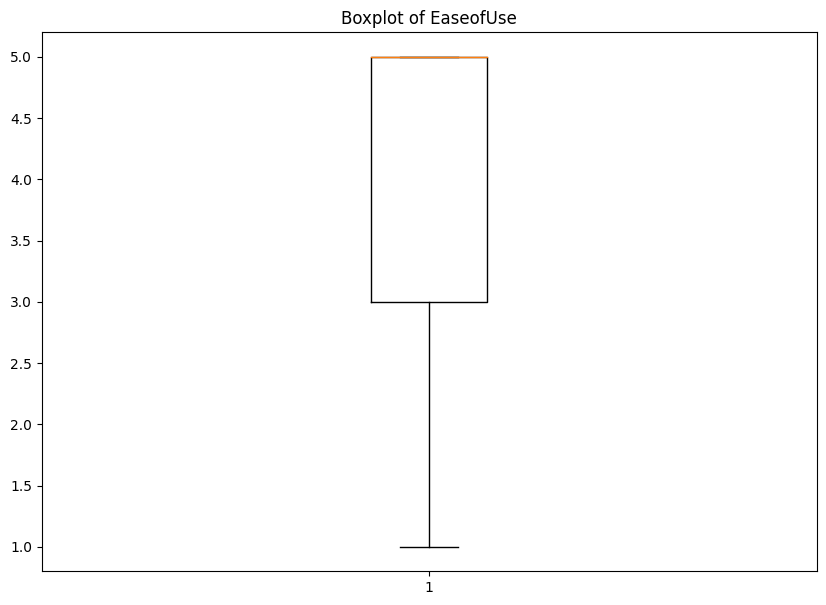

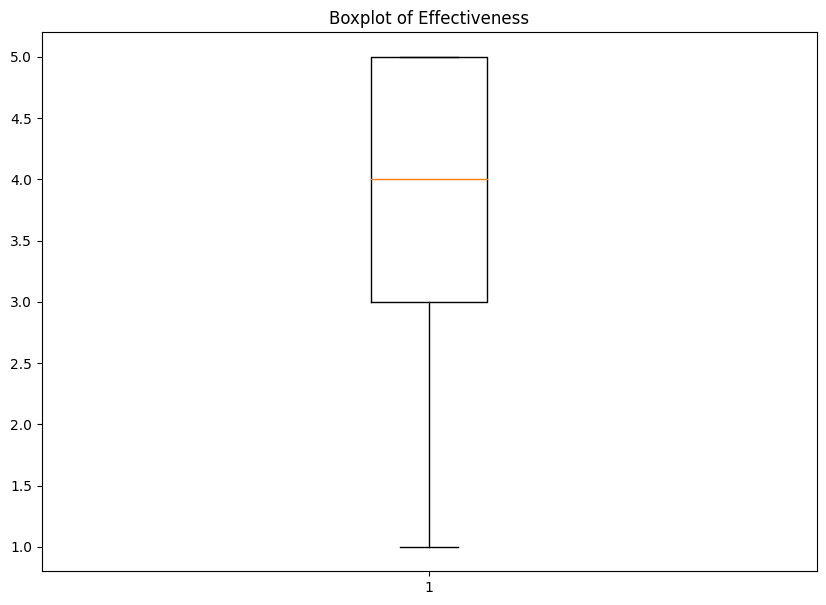

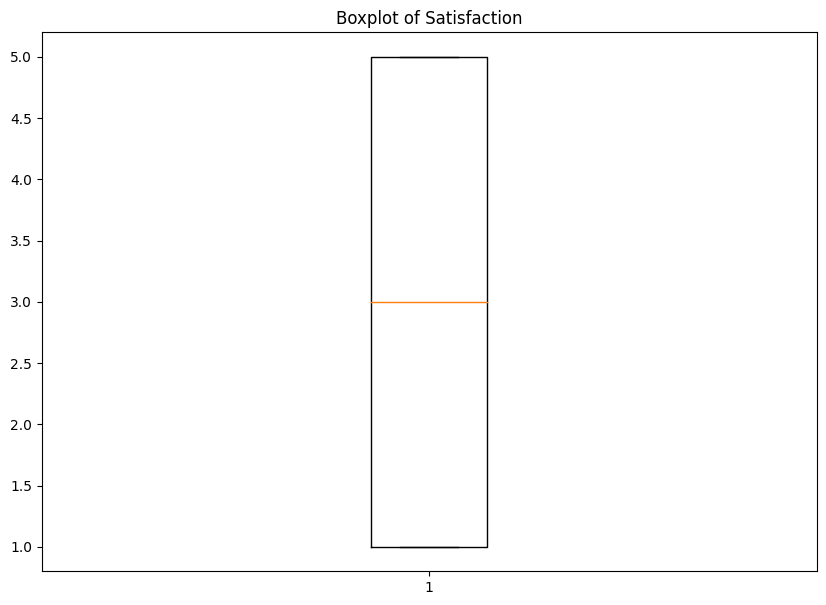

In [221]:
# boxplot of outliers in continuous numerical features
for i in continuous_numerical_features:
    
    # boxplot of columns
    plt.boxplot(data[i])
    text = "Boxplot of"
    
    # display title
    plt.title(text+" "+i)
    plt.show()

~ From the above boxplot, outliers are not present for any of the columns.

## CORRELATION

In [222]:
# Correlation performed on numerical features
P = data[numerical_features]

In [223]:
# creating an instance for correlation
corrmatrix = round(P.corr(), 2)

# displaying the values of 'corrmatrix'
corrmatrix

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Year
DrugId,1.00,-0.02,-0.01,-0.04,0.01,0.22
EaseofUse,-0.02,1.00,0.55,0.56,0.03,-0.07
Effectiveness,-0.01,0.55,1.00,0.79,0.05,-0.04
Satisfaction,-0.04,0.56,0.79,1.00,0.02,-0.05
UsefulCount,0.01,0.03,0.05,0.02,1.00,-0.06
Year,0.22,-0.07,-0.04,-0.05,-0.06,1.00


In [224]:
# display information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Age            362806 non-null  object        
 1   Condition      362806 non-null  object        
 2   Date           362806 non-null  datetime64[ns]
 3   Drug           362806 non-null  object        
 4   DrugId         362806 non-null  int32         
 5   EaseofUse      362806 non-null  int8          
 6   Effectiveness  362806 non-null  int8          
 7   Reviews        362806 non-null  object        
 8   Satisfaction   362806 non-null  int8          
 9   Sex            362806 non-null  object        
 10  Sides          362806 non-null  object        
 11  UsefulCount    362806 non-null  int16         
 12  Year           362806 non-null  int64         
dtypes: datetime64[ns](1), int16(1), int32(1), int64(1), int8(3), object(6)
memory usage: 25.3+ MB


In [225]:
# display column names
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Year'],
      dtype='object')

In [226]:
# percentage of different classes in the 'Sides' column
data['Sides'].value_counts(normalize=True)

Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                                                 0.091021
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.                              0.033395
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                                       0.025253
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.                                    0.021472
Nausea ,  vomiting ,  stomach  upset,  diarrhea ,  weakness , or a  metallic taste  in the  mouth  may occur.                                                                 0.014807
                                                                                     

~ Imbalanced dataset

~ Features: 'Age', 'Condition', 'Drug', 'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'UsefulCount', 'Year' columns

~ Target: 'Sides' columns


In [227]:
# put target and remaining columns not considered as features into  separate columns
target = data.pop('Sides')
rem1 = data.pop('Date')
rem2 = data.pop('DrugId')

# display first 5 rows
data.head()

,Age,Condition,Drug,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,UsefulCount,Year
0,75 or over,Stuffy Nose,25dph-7.5peh,5,5,I'm a retired physician and of all the meds I ...,5,Male,0,2014
1,25-34,Cold Symptoms,25dph-7.5peh,5,5,cleared me right up even with my throat hurtin...,5,Female,1,2011
2,65-74,Other,warfarin (bulk) 100 % powder,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,0,2012
3,75 or over,Other,warfarin (bulk) 100 % powder,2,2,FALLING AND DON'T REALISE IT,1,Female,0,2010
4,35-44,Other,warfarin (bulk) 100 % powder,1,1,My grandfather was prescribed this medication ...,1,Male,1,2009


In [228]:
# making a copy of the dataframe

# features
X = data.copy()

# target
y = target.copy()

## ENCODING

~ encoding columns 'Age', 'Condition', 'Drug', 'Reviews', 'Sex', 'Year', 'Sides'


In [229]:
# converting categorical data to numeric

X['Age'] = pd.factorize(X['Age'])[0]
X['Condition'] = pd.factorize(X['Condition'])[0]
X['Drug'] = pd.factorize(X['Drug'])[0]
X['Reviews'] = pd.factorize(X['Reviews'])[0]
X['Sex'] = pd.factorize(X['Sex'])[0]
X['Year'] = pd.factorize(X['Year'])[0]

y = pd.factorize(y)[0]

# display first 5 rows of the dataframe
X.head()

,Age,Condition,Drug,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,UsefulCount,Year
0,0,0,0,5,5,0,5,0,0,0
1,1,1,0,5,5,1,5,1,1,1
2,2,2,1,2,3,2,3,1,0,2
3,0,2,1,2,2,3,1,1,0,3
4,3,2,1,1,1,4,1,0,1,4


In [230]:
# display
y

array([   0,    0,    1, ..., 1064, 1064, 1064], dtype=int64)

In [231]:
# summarize observations by class label
counter = Counter(y)
print(counter)

Counter({1: 33023, 2: 12116, 62: 9162, 236: 7790, 452: 5372, 590: 5194, 1387: 4919, 977: 4770, 948: 4431, 1087: 4404, 133: 4315, 120: 4209, 132: 4155, 1494: 3810, 52: 3731, 472: 3561, 243: 3449, 751: 3237, 1404: 3198, 9: 3175, 856: 3156, 614: 3136, 760: 3059, 464: 3030, 947: 2942, 187: 2858, 1028: 2803, 271: 2777, 591: 2583, 536: 2562, 448: 2455, 409: 2400, 39: 2267, 1115: 2163, 45: 2134, 943: 2099, 91: 2080, 83: 1905, 36: 1891, 1258: 1871, 144: 1723, 211: 1710, 430: 1639, 411: 1562, 1072: 1510, 1105: 1492, 209: 1470, 572: 1446, 899: 1423, 63: 1396, 420: 1375, 1002: 1334, 1498: 1285, 173: 1255, 482: 1245, 1064: 1214, 996: 1202, 455: 1201, 509: 1196, 543: 1189, 42: 1174, 664: 1154, 167: 1149, 587: 1120, 348: 1061, 955: 1040, 851: 1024, 150: 1020, 1082: 1003, 253: 992, 1071: 943, 145: 934, 585: 928, 372: 927, 520: 924, 61: 919, 327: 917, 57: 898, 532: 880, 602: 880, 736: 871, 4: 870, 701: 869, 168: 864, 1097: 858, 357: 851, 1027: 842, 419: 837, 1036: 833, 1022: 826, 1155: 806, 1012: 793,

## SCALING

**1) standard scaler**

In [232]:
# scaling features
stdscaler = StandardScaler()
X1 = stdscaler.fit_transform(X)

In [233]:
# display
X1

array([[-1.97999267, -0.7954884 , -1.47110698, ..., -1.64331323,
        -0.72337537, -1.35622684],
       [-1.4186266 , -0.79219302, -1.47110698, ...,  0.60852672,
        -0.61612787, -1.07415371],
       [-0.85726052, -0.78889764, -1.4706326 , ...,  0.60852672,
        -0.72337537, -0.79208058],
       ...,
       [-1.4186266 ,  0.69402471,  1.89273703, ...,  0.60852672,
        -0.40163287,  0.0541388 ],
       [ 0.26547163,  0.69402471,  1.89273703, ..., -1.64331323,
        -0.61612787,  0.0541388 ],
       [ 0.82683771,  0.69402471,  1.89273703, ...,  0.60852672,
        -0.40163287,  0.0541388 ]])

In [234]:
# converting it to a dataframe
X1 = pd.DataFrame(X1, columns=['Age', 'Condition', 'Drug', 'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'UsefulCount', 'Year'])

In [235]:
# display first 5 rows of features
X1.head()

,Age,Condition,Drug,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,UsefulCount,Year
0,-1.979993,-0.795488,-1.471107,0.743892,1.008282,-1.340136,1.157394,-1.643313,-0.723375,-1.356227
1,-1.418627,-0.792193,-1.471107,0.743892,1.008282,-1.340124,1.157394,0.608527,-0.616128,-1.074154
2,-0.857261,-0.788898,-1.470633,-1.532859,-0.365428,-1.340111,-0.084031,0.608527,-0.723375,-0.792081
3,-1.979993,-0.788898,-1.470633,-1.532859,-1.052283,-1.340098,-1.325456,0.608527,-0.723375,-0.510007
4,-0.295894,-0.788898,-1.470633,-2.291776,-1.739139,-1.340086,-1.325456,-1.643313,-0.616128,-0.227934


In [236]:
# target
y

array([   0,    0,    1, ..., 1064, 1064, 1064], dtype=int64)

## SPLITTING THE DATASET INTO TRAINING AND TESTING

In [237]:
# splitting the data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=42, stratify = y)

In [238]:
# taking a variable skfold_validator and specifying the number of splits = 2 
skfold_validator = StratifiedKFold(n_splits=2)

## STRATIFIED K-FOLD CROSS VALIDATION

In [239]:
# check which all index are given for training and testing
for train_index, test_index in skfold_validator.split(X1,y):
# skfold_validator.split(X,y) - using skfold_validator splitting X and y
    print('Training Index:', train_index)
    print('Testing Index:', test_index)
    # X_train1, X_test1 = X1[train_index], X1[test_index]
    # y_train, y_test = y[train_index], y[test_index]

Training Index: [   113    114    115 ... 362803 362804 362805]
Testing Index: [     0      1      2 ... 362196 362197 362198]
Training Index: [     0      1      2 ... 362196 362197 362198]
Testing Index: [   113    114    115 ... 362803 362804 362805]


In [240]:
# count of rows and columns in training data
X_train.shape, y_train.shape

((272104, 10), (272104,))

In [241]:
# count of rows and columns in testing data
X_test.shape, y_test.shape

((90702, 10), (90702,))

In [242]:
# function to print average accuracy score across the two folds, and the standard deviation of the accuracy score 
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        

## MODEL

### Decision Tree

In [243]:
# creating an instance for decision tree classifier
dec_tree = DecisionTreeClassifier(random_state=42) 

In [244]:
# creating model using training data 
dec_model = dec_tree.fit(X_train, y_train)

**STRATIFIED K FOLD CROSS VALIDATION**

In [245]:
# calculate cross validation score of the training dataset

# calculate cross validation score
cv_decresult = cross_val_score(dec_model, X_train, y_train, cv=skfold_validator)

# display cross validation score of each folds
print("Cross validation score of each fold: ", cv_decresult)

# display mean of cross validation score
print("Mean of cross validation score across 2 folds: ", np.mean(cv_decresult))

Cross validation score of each fold:  [0.94880634 0.95135683]
Mean of cross validation score across 2 folds:  0.9500815864522388


In [246]:
# calculate cross validation score of the entire dataset

# calculate cross validation score
cv_decresult = cross_val_score(dec_model, X1, y, cv=skfold_validator)

# display cross validation score of each folds
print("Cross validation score of each fold: ", cv_decresult)

# display mean of cross validation score
print("Mean of cross validation score across 2 folds: ", np.mean(cv_decresult))

Cross validation score of each fold:  [0.5863795  0.60541446]
Mean of cross validation score across 2 folds:  0.5958969807555553


**TUNING DECISION TREE**

In [247]:
# defining parameter range
param_grid = {'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
            'min_samples_leaf': [1, 5, 10, 20, 50, 100],
            'criterion': ["gini", "entropy"]} 

In [248]:
# Create a GridSearchCV object
grid = GridSearchCV(dec_tree, param_grid, refit = True, verbose = 3, n_jobs=-1, cv=skfold_validator)

In [249]:
# fitting the training data
grid.fit(X_train, y_train)

Fitting 2 folds for each of 252 candidates, totalling 504 fits


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.95008159 0.93146371 0.90765296 0.86743672 0.78933055 0.71050407
 0.11380208 0.11380208 0.11380208 0.11380208 0.11380208 0.11380208
 0.1222437  0.1222437  0.1222437  0.1222437  0.1222437  0.1222437
 0.1362604  0.1362604  0.1362604  0.1362604  0.1362604  0.1362604
 0.1613611         nan 0.16135007 0.16135742 0.16120307 0.16100829
 0.18598036 0.18596566 0.18594728        nan 0.18569738 0.18518655
 0.21836871 0.21831359 0.21828419 0.21811146 0.21771455 0.21714492
 0.25506424 0.25496501 0.25490621 0.25479964 0.25359421 0.25162805
 0.29923485 0.29906212 0.29905845 0.29857701 0.29689016 0.29464469
 0.34201629 0.34173331 0.34155323 0.34036618 0.33776424 0.33452283
 0.38207818 0.38174007 0.38135419 0.37967836 0.37688163 0.37166304
 0.42108532 0.42074721 0.42010775 0.41797989 0.41431217 0.40566475
 0.46424161 0.46363523 0

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                       12, 13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [1, 5, 10, 20, 50, 100]},
             verbose=3)

In [250]:
# calling function
print_results(grid)

BEST PARAMS: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}

0.95 (+/-0.003) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}
0.931 (+/-0.002) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5}
0.908 (+/-0.001) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10}
0.867 (+/-0.0) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 20}
0.789 (+/-0.001) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 50}
0.711 (+/-0.007) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 100}
0.114 (+/-0.0) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
0.114 (+/-0.0) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 5}
0.114 (+/-0.0) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 10}
0.114 (+/-0.0) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 20}
0.114 (+/-0.0) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 50}
0.11

**MODEL EVALUATION**

**Fit best models on full training set**

Accuracy scores of top few models
*********
0.978 (+/-0.001) for {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}

0.978 (+/-0.001) for {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 1}

0.978 (+/-0.001) for {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1}

0.977 (+/-0.001) for {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 1}

0.977 (+/-0.001) for {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 1}

0.977 (+/-0.001) for {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1}

0.976 (+/-0.001) for {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1}

In [251]:
# create instances of top few models and fit the training data
dectree_model1 = DecisionTreeClassifier(max_depth = None, min_samples_leaf = 1, criterion = 'entropy', random_state=42).fit(X_train, y_train)
dectree_model2 = DecisionTreeClassifier(max_depth = 19, min_samples_leaf = 1, criterion = 'entropy', random_state=42).fit(X_train, y_train)
dectree_model3 = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 1, criterion = 'entropy', random_state=42).fit(X_train, y_train)
dectree_model4 = DecisionTreeClassifier(max_depth = 16, min_samples_leaf = 1, criterion = 'entropy', random_state=42).fit(X_train, y_train)
dectree_model5 = DecisionTreeClassifier(max_depth = 17, min_samples_leaf = 1, criterion = 'entropy', random_state=42).fit(X_train, y_train)
dectree_model6 = DecisionTreeClassifier(max_depth = 18, min_samples_leaf = 1, criterion = 'entropy', random_state=42).fit(X_train, y_train)
dectree_model7 = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 1, criterion = 'entropy', random_state=42).fit(X_train, y_train)

In [252]:
# finding accuracy, precision, recall of top few models
for mdl in [dectree_model1, dectree_model2, dectree_model3, dectree_model4, dectree_model5, dectree_model6, dectree_model7]:
    y_pred = mdl.predict(X_test) 
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred, average = 'micro'), 3)
    recall = round(recall_score(y_test, y_pred, average = 'micro'), 3)
    print('max_depth: {} / min_samples_leaf: {} / criterion: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth, mdl.min_samples_leaf, mdl.criterion, accuracy, precision, recall))

max_depth: None / min_samples_leaf: 1 / criterion: entropy -- A: 0.989 / P: 0.989 / R: 0.989
max_depth: 19 / min_samples_leaf: 1 / criterion: entropy -- A: 0.988 / P: 0.988 / R: 0.988
max_depth: 20 / min_samples_leaf: 1 / criterion: entropy -- A: 0.989 / P: 0.989 / R: 0.989
max_depth: 16 / min_samples_leaf: 1 / criterion: entropy -- A: 0.988 / P: 0.988 / R: 0.988
max_depth: 17 / min_samples_leaf: 1 / criterion: entropy -- A: 0.988 / P: 0.988 / R: 0.988
max_depth: 18 / min_samples_leaf: 1 / criterion: entropy -- A: 0.988 / P: 0.988 / R: 0.988
max_depth: 15 / min_samples_leaf: 1 / criterion: entropy -- A: 0.986 / P: 0.986 / R: 0.986


In [253]:
# best model prediction

# create instance and fit the training data
dectree_best = DecisionTreeClassifier(max_depth = None, min_samples_leaf = 1, criterion = 'entropy', random_state=42)
dectree_bestmodel = dectree_best.fit(X_train, y_train)

# Make predictions
y_predict_tree = {
    "train": dectree_bestmodel.predict(X_train),
    "test": dectree_bestmodel.predict(X_test),
}
    
# Create train and test scores
scores_base = {
    "train": accuracy_score(y_train, y_predict_tree["train"]),
    "test": accuracy_score(y_test, y_predict_tree["test"]),
}
hamming = hamming_loss(y_test, y_predict_tree["test"])

print(f" Accuracy score of training data: {scores_base['train']*100}%")
print(f"Accuracy score of test data: {scores_base['test']*100}%")
print(f"Incorrect predictions of test data: {hamming*100}%")

 Accuracy score of training data: 99.99742745420869%
Accuracy score of test data: 98.8511829948623%
Incorrect predictions of test data: 1.1488170051377038%


In [254]:
# feature importance
dec_features_tree = pd.DataFrame({"feature_name": X_train.columns, "importance": dectree_bestmodel.feature_importances_})
dec_features_tree.sort_values(by=["importance"], ascending=False, inplace=True)

# display feature importance
print(dec_features_tree.head())

  feature_name  importance
2         Drug    0.972261
1    Condition    0.016588
5      Reviews    0.009044
9         Year    0.000564
8  UsefulCount    0.000394


In [255]:
# display classification report
print(classification_report(y_test, y_predict_tree["test"], zero_division=1))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        38
           1       0.98      0.97      0.97      8256
           2       0.99      0.99      0.99      3029
           3       0.87      1.00      0.93        40
           4       1.00      1.00      1.00       218
           5       0.81      0.82      0.82       176
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00       794
          10       1.00      1.00      1.00         2
          11       0.90      0.95      0.92        19
          12       1.00      0.00      0.00         1
          13       1.00      1.00      1.00        31
          14       1.00      1.00      1.00         5
          15       0.92      1.00      0.96        11
          16       0.00      0.00      0.00        15
          17       0.99    

In [256]:
# save the model
filename = 'savedmodel.sav'

# save the model using pickle
pickle.dump(dectree_best, open(filename, 'wb'))
# wb-write binary